Dataset Link:
# https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

# Explaining the dataset
- work_year: The year the salary was paid.
- experience_level: The experience level in the job during the year with the following possible values
    - EN Entry-level
    - MI Junior Mid-level
    - SE Intermediate Senior-level
    - EX Expert Executive-level / Director
- employment_type: The type of employment for the role
    - PT Part-time
    - FT Full-time
    - CT Contract
    - FL Freelance
- job_title: The role worked in during the year.
- salary: The total gross salary amount paid.
- salary_currency: The currency of the salary paid as an ISO 4217 currency code.
- salary_in_usd: The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com.
- employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
- remote_ratio: The overall amount of work done remotely, possible values are as follows
    - 0 No remote work (less than 20%)
    - 50 Partially remote
    - 100 Fully remote (more than 80%)
- company_location: The country of the employer's main office or contracting branch as an ISO 3166 country code.
- company_size: The average number of people that worked for the company during the year
    - S less than 50 employees (small)
    - M 50 to 250 employees (medium)
    - L more than 250 employees (large)

# import libraries
- importing some necessary libraries

In [143]:
# libraries for Data Manipulation
import pandas as pd
import numpy as np

# libraies for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import plotly.express as px
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.colors as colors
import matplotlib.colors as mcolors

# libraries for Machine Learning
from sklearn.preprocessing import OrdinalEncoder
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

import warnings
warnings.filterwarnings('ignore')

# load dataset
- Loading the dataset.


In [144]:
O_df = pd.read_csv('/content/ds_salaries.csv')
O_df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


### copying the dataset
- copying the original dataset because we dont want to loss the original one
 we'll work & experiment with the coppied dataset.

In [145]:


df = O_df.copy()
df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


### Dropping some unnecessary colummns.
- In this data, I have dropped some columns, named 'Unnamed: 0', 'salary' and 'salary_currency' and following is the resulting data:

In [146]:
# droping some columns
df.drop(['Unnamed: 0', 'salary', 'salary_currency'], axis=1, inplace=True)
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


### Checking Numerical & categorical features
- in this following code will nicely describe the datasets Numeric and categorical features of the dataset after dropping unrelavent columns.

In [147]:
# An outline of the dataset are follows

print(f"There are {df.shape[0]} instances.")
print(f"There are {df.shape[1]} dataframe columns/attributes.")

num_attribs = ['work_year', 'salary_in_usd', 'remote_ratio']
cat_attribs = [df.columns[i] for i in range(len(df.columns)) if df.columns[i] not in num_attribs]

print(f"\nThere are {len(num_attribs)} numerical attributes: ")
for i in range(len(num_attribs)):
    print(f"{i+1}. {num_attribs[i]}")

print(f"\nThere are {len(cat_attribs)} categorical attributes: ")
for i in range(len(cat_attribs)):
    print(f"{i+1}. {cat_attribs[i]}")

There are 607 instances.
There are 9 dataframe columns/attributes.

There are 3 numerical attributes: 
1. work_year
2. salary_in_usd
3. remote_ratio

There are 6 categorical attributes: 
1. experience_level
2. employment_type
3. job_title
4. employee_residence
5. company_location
6. company_size


In [148]:
# Checking first 5 rows
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [149]:
# checking last 5 rows
df.tail()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,2022,SE,FT,Data Engineer,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,US,100,US,M
606,2022,MI,FT,AI Scientist,200000,IN,100,US,L


### Randomly checking the daataset
- Randomly checking the dataset helps us to get an idea about the dataset. like we can get an idea about the missing values, null values or extream values present in the dataset.

In [150]:
# Randomly checking 30 rows of the dataset
df.sample(30)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
387,2022,SE,FT,Data Analyst,164000,US,0,US,M
214,2021,EN,FT,Machine Learning Engineer,24823,DE,50,DE,M
461,2022,EN,FT,Financial Data Analyst,100000,US,50,US,L
135,2021,MI,FT,Data Analyst,90000,US,100,US,M
17,2020,SE,FT,Big Data Engineer,114047,PL,100,GB,S
123,2021,EN,FT,Applied Data Scientist,110037,GB,0,GB,L
152,2021,MI,FT,Data Scientist,75774,CA,100,CA,L
63,2020,SE,FT,Data Scientist,412000,US,100,US,L
209,2021,SE,FT,Data Analytics Manager,120000,US,0,US,L
543,2022,MI,FT,Data Engineer,99100,US,0,US,M


### Shape of the dataset
- checking how many rows and columns/ features the dataset got. Its very necessary to know about the shape of the dataset we'll working on.

In [151]:
# checking shape of the dataset
df.shape

(607, 9)

# Features name
- Getting feature names helps us about the dimention of out dataset.

In [152]:
# Checking columns
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

### count of columns

In [153]:
# checking how many features/columns we got in the working dataset
df.columns.value_counts().sum()

9

# Checking Duplicate values.
- Duplicate values can create bias in the dataset. It causes computational cost and time. Duplicated values complex the dataset

In [154]:
# checking duplicate values
df.duplicated().sum()

42

# Note:
- Here we can see 42 duplicated values. But those are not duplicated values for this dataset.
- Because there are multiple workers works in same position, workplace, salaries etc.
- So we can say overall there are none duplicated values.

### >> Review 1:
- There is no overall duplicate values.
- There are 607 rows and 12 columns

### Data type of each columns
- info() function helps us to find out the informations of the dataset like
  - features name ith index number.
  - counts of rows
  - count of columns
  - is there any null values
  - data types of features

In [155]:
# checking data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(3), object(6)
memory usage: 42.8+ KB


### >> Review 2:
* In terms of data types, the attributes of this data set are mostly in the right format.
* The 'remote_ratio' column should be returned to the categorical format and will be done later.

###  Consider the set of values of the categorical attributes
We will see how many distinguishing values each categorical attribute has using the `set()` method.

In [156]:
# Distinguished values of 'work_year' feature
set(df['work_year'].to_list())

{2020, 2021, 2022}

In [157]:
# Distinguished values of 'experience_level' feature
set(df['experience_level'].to_list())

{'EN', 'EX', 'MI', 'SE'}

In [158]:
# Distinguished values of 'employment_type' feature
set(df['employment_type'].to_list())

{'CT', 'FL', 'FT', 'PT'}

In [159]:
# Distinguished values of 'remote_ratio' feature
set(df['remote_ratio'].to_list())

{0, 50, 100}

In [160]:
# Distinguished values of 'company_size' feature
set(df['company_size'].to_list())

{'L', 'M', 'S'}

In [161]:
# Distinguished values of 'employee_residence' feature

# The ISO country codes are internationally recognized codes that designate every country and most of
# the dependent areas a two-letter combination or a three-letter combination;
# it is like an acronym, that stands for a country or a state.
set(df['employee_residence'].to_list())

{'AE',
 'AR',
 'AT',
 'AU',
 'BE',
 'BG',
 'BO',
 'BR',
 'CA',
 'CH',
 'CL',
 'CN',
 'CO',
 'CZ',
 'DE',
 'DK',
 'DZ',
 'EE',
 'ES',
 'FR',
 'GB',
 'GR',
 'HK',
 'HN',
 'HR',
 'HU',
 'IE',
 'IN',
 'IQ',
 'IR',
 'IT',
 'JE',
 'JP',
 'KE',
 'LU',
 'MD',
 'MT',
 'MX',
 'MY',
 'NG',
 'NL',
 'NZ',
 'PH',
 'PK',
 'PL',
 'PR',
 'PT',
 'RO',
 'RS',
 'RU',
 'SG',
 'SI',
 'TN',
 'TR',
 'UA',
 'US',
 'VN'}

In [162]:
# Distinguished values of 'company_location' feature
set(df['company_location'].to_list())

{'AE',
 'AS',
 'AT',
 'AU',
 'BE',
 'BR',
 'CA',
 'CH',
 'CL',
 'CN',
 'CO',
 'CZ',
 'DE',
 'DK',
 'DZ',
 'EE',
 'ES',
 'FR',
 'GB',
 'GR',
 'HN',
 'HR',
 'HU',
 'IE',
 'IL',
 'IN',
 'IQ',
 'IR',
 'IT',
 'JP',
 'KE',
 'LU',
 'MD',
 'MT',
 'MX',
 'MY',
 'NG',
 'NL',
 'NZ',
 'PK',
 'PL',
 'PT',
 'RO',
 'RU',
 'SG',
 'SI',
 'TR',
 'UA',
 'US',
 'VN'}

In [163]:
# Distinguished values of 'job_title' feature
set(df['job_title'].to_list())

{'3D Computer Vision Researcher',
 'AI Scientist',
 'Analytics Engineer',
 'Applied Data Scientist',
 'Applied Machine Learning Scientist',
 'BI Data Analyst',
 'Big Data Architect',
 'Big Data Engineer',
 'Business Data Analyst',
 'Cloud Data Engineer',
 'Computer Vision Engineer',
 'Computer Vision Software Engineer',
 'Data Analyst',
 'Data Analytics Engineer',
 'Data Analytics Lead',
 'Data Analytics Manager',
 'Data Architect',
 'Data Engineer',
 'Data Engineering Manager',
 'Data Science Consultant',
 'Data Science Engineer',
 'Data Science Manager',
 'Data Scientist',
 'Data Specialist',
 'Director of Data Engineering',
 'Director of Data Science',
 'ETL Developer',
 'Finance Data Analyst',
 'Financial Data Analyst',
 'Head of Data',
 'Head of Data Science',
 'Head of Machine Learning',
 'Lead Data Analyst',
 'Lead Data Engineer',
 'Lead Data Scientist',
 'Lead Machine Learning Engineer',
 'ML Engineer',
 'Machine Learning Developer',
 'Machine Learning Engineer',
 'Machine Lear

#### > Review 3:
- Displaying value with the default abbreviations in some of the following features can be difficult or confusing for viewers:
    - employment_type
    - employee_residence
    - remote_ratio
    - company_location
    - company_size


#### 📌 Solution:
- Replace abbreviated attribute values with full words for a clearer understanding of the data and for clearer visualizations.

In [164]:
# experience_level
# EN - Entry-level / Junior
# MI - Mid-level / Intermediate
# SE - Senior-level / Expert
# EX -Executive-level / Director
df['experience_level'] = df['experience_level'].replace(['EN', 'MI', 'SE', 'EX'], ['Junior', 'Middle', 'Senior', 'Executive'])

# employment_type
df['employment_type'] = df['employment_type'].replace(['PT', 'FT', 'CT', 'FL'], ['Part Time', 'Full Time', 'Contract', 'Freelance'])

# remote_ratio
df['remote_ratio'] = df['remote_ratio'].replace([100, 50, 0],['Fully Remote', 'Partially Remote', 'On Site'])
df['remote_ratio'] = df['remote_ratio'].astype(object)

# company_size
df['company_size'] =df['company_size'].replace(['L', 'M', 'S'], ['Large', 'Medium', 'Small'])

#Employee Residence & Company location
#ISO code - The ISO country codes are internationally recognized codes that designate every country
# and most of the dependent areas a two-letter combination or a three-letter combination; it is like an acronym, that stands for a country or a state.

ISO3166 = {
	'AD': 'Andorra',
	'AE': 'United Arab Emirates',
	'AF': 'Afghanistan',
	'AG': 'Antigua & Barbuda',
	'AI': 'Anguilla',
	'AL': 'Albania',
	'AM': 'Armenia',
	'AN': 'Netherlands Antilles',
	'AO': 'Angola',
	'AQ': 'Antarctica',
	'AR': 'Argentina',
	'AS': 'American Samoa',
	'AT': 'Austria',
	'AU': 'Australia',
	'AW': 'Aruba',
	'AZ': 'Azerbaijan',
	'BA': 'Bosnia and Herzegovina',
	'BB': 'Barbados',
	'BD': 'Bangladesh',
	'BE': 'Belgium',
	'BF': 'Burkina Faso',
	'BG': 'Bulgaria',
	'BH': 'Bahrain',
	'BI': 'Burundi',
	'BJ': 'Benin',
	'BM': 'Bermuda',
	'BN': 'Brunei Darussalam',
	'BO': 'Bolivia',
	'BR': 'Brazil',
	'BS': 'Bahama',
	'BT': 'Bhutan',
	'BU': 'Burma (no longer exists)',
	'BV': 'Bouvet Island',
	'BW': 'Botswana',
	'BY': 'Belarus',
	'BZ': 'Belize',
	'CA': 'Canada',
	'CC': 'Cocos (Keeling) Islands',
	'CF': 'Central African Republic',
	'CG': 'Congo',
	'CH': 'Switzerland',
	'CI': 'Côte D\'ivoire (Ivory Coast)',
	'CK': 'Cook Iislands',
	'CL': 'Chile',
	'CM': 'Cameroon',
	'CN': 'China',
	'CO': 'Colombia',
	'CR': 'Costa Rica',
	'CS': 'Czechoslovakia (no longer exists)',
	'CU': 'Cuba',
	'CV': 'Cape Verde',
	'CX': 'Christmas Island',
	'CY': 'Cyprus',
	'CZ': 'Czech Republic',
	'DD': 'German Democratic Republic (no longer exists)',
	'DE': 'Germany',
	'DJ': 'Djibouti',
	'DK': 'Denmark',
	'DM': 'Dominica',
	'DO': 'Dominican Republic',
	'DZ': 'Algeria',
	'EC': 'Ecuador',
	'EE': 'Estonia',
	'EG': 'Egypt',
	'EH': 'Western Sahara',
	'ER': 'Eritrea',
	'ES': 'Spain',
	'ET': 'Ethiopia',
	'FI': 'Finland',
	'FJ': 'Fiji',
	'FK': 'Falkland Islands (Malvinas)',
	'FM': 'Micronesia',
	'FO': 'Faroe Islands',
	'FR': 'France',
	'FX': 'France, Metropolitan',
	'GA': 'Gabon',
	'GB': 'United Kingdom (Great Britain)',
	'GD': 'Grenada',
	'GE': 'Georgia',
	'GF': 'French Guiana',
	'GH': 'Ghana',
	'GI': 'Gibraltar',
	'GL': 'Greenland',
	'GM': 'Gambia',
	'GN': 'Guinea',
	'GP': 'Guadeloupe',
	'GQ': 'Equatorial Guinea',
	'GR': 'Greece',
	'GS': 'South Georgia and the South Sandwich Islands',
	'GT': 'Guatemala',
	'GU': 'Guam',
	'GW': 'Guinea-Bissau',
	'GY': 'Guyana',
	'HK': 'Hong Kong',
	'HM': 'Heard & McDonald Islands',
	'HN': 'Honduras',
	'HR': 'Croatia',
	'HT': 'Haiti',
	'HU': 'Hungary',
	'ID': 'Indonesia',
	'IE': 'Ireland',
	'IL': 'Israel',
	'IN': 'India',
	'IO': 'British Indian Ocean Territory',
	'IQ': 'Iraq',
	'IR': 'Islamic Republic of Iran',
	'IS': 'Iceland',
	'IT': 'Italy',
	'JM': 'Jamaica',
	'JO': 'Jordan',
	'JP': 'Japan',
	'KE': 'Kenya',
	'KG': 'Kyrgyzstan',
	'KH': 'Cambodia',
	'KI': 'Kiribati',
	'KM': 'Comoros',
	'KN': 'St. Kitts and Nevis',
	'KP': 'Korea, Democratic People\'s Republic of',
	'KR': 'Korea, Republic of',
	'KW': 'Kuwait',
	'KY': 'Cayman Islands',
	'KZ': 'Kazakhstan',
	'LA': 'Lao People\'s Democratic Republic',
	'LB': 'Lebanon',
	'LC': 'Saint Lucia',
	'LI': 'Liechtenstein',
	'LK': 'Sri Lanka',
	'LR': 'Liberia',
	'LS': 'Lesotho',
	'LT': 'Lithuania',
	'LU': 'Luxembourg',
	'LV': 'Latvia',
	'LY': 'Libyan Arab Jamahiriya',
	'MA': 'Morocco',
	'MC': 'Monaco',
	'MD': 'Moldova, Republic of',
	'MG': 'Madagascar',
	'MH': 'Marshall Islands',
	'ML': 'Mali',
	'MN': 'Mongolia',
	'MM': 'Myanmar',
	'MO': 'Macau',
	'MP': 'Northern Mariana Islands',
	'MQ': 'Martinique',
	'MR': 'Mauritania',
	'MS': 'Monserrat',
	'MT': 'Malta',
	'MU': 'Mauritius',
	'MV': 'Maldives',
	'MW': 'Malawi',
	'MX': 'Mexico',
	'MY': 'Malaysia',
	'MZ': 'Mozambique',
	'NA': 'Namibia',
	'NC': 'New Caledonia',
	'NE': 'Niger',
	'NF': 'Norfolk Island',
	'NG': 'Nigeria',
	'NI': 'Nicaragua',
	'NL': 'Netherlands',
	'NO': 'Norway',
	'NP': 'Nepal',
	'NR': 'Nauru',
	'NT': 'Neutral Zone (no longer exists)',
	'NU': 'Niue',
	'NZ': 'New Zealand',
	'OM': 'Oman',
	'PA': 'Panama',
	'PE': 'Peru',
	'PF': 'French Polynesia',
	'PG': 'Papua New Guinea',
	'PH': 'Philippines',
	'PK': 'Pakistan',
	'PL': 'Poland',
	'PM': 'St. Pierre & Miquelon',
	'PN': 'Pitcairn',
	'PR': 'Puerto Rico',
	'PT': 'Portugal',
	'PW': 'Palau',
	'PY': 'Paraguay',
	'QA': 'Qatar',
	'RE': 'Réunion',
	'RO': 'Romania',
	'RU': 'Russian Federation',
	'RW': 'Rwanda',
	'SA': 'Saudi Arabia',
	'SB': 'Solomon Islands',
	'SC': 'Seychelles',
	'SD': 'Sudan',
	'SE': 'Sweden',
	'SG': 'Singapore',
	'SH': 'St. Helena',
	'SI': 'Slovenia',
	'SJ': 'Svalbard & Jan Mayen Islands',
	'SK': 'Slovakia',
	'SL': 'Sierra Leone',
	'SM': 'San Marino',
	'SN': 'Senegal',
	'SO': 'Somalia',
	'SR': 'Suriname',
	'ST': 'Sao Tome & Principe',
	'SU': 'Union of Soviet Socialist Republics (no longer exists)',
	'SV': 'El Salvador',
	'SY': 'Syrian Arab Republic',
	'SZ': 'Swaziland',
	'TC': 'Turks & Caicos Islands',
	'TD': 'Chad',
	'TF': 'French Southern Territories',
	'TG': 'Togo',
	'TH': 'Thailand',
	'TJ': 'Tajikistan',
	'TK': 'Tokelau',
	'TM': 'Turkmenistan',
	'TN': 'Tunisia',
	'TO': 'Tonga',
	'TP': 'East Timor',
	'TR': 'Turkey',
	'TT': 'Trinidad & Tobago',
	'TV': 'Tuvalu',
	'TW': 'Taiwan, Province of China',
	'TZ': 'Tanzania, United Republic of',
	'UA': 'Ukraine',
	'UG': 'Uganda',
	'UM': 'United States Minor Outlying Islands',
	'US': 'United States of America',
	'UY': 'Uruguay',
	'UZ': 'Uzbekistan',
	'VA': 'Vatican City State (Holy See)',
	'VC': 'St. Vincent & the Grenadines',
	'VE': 'Venezuela',
	'VG': 'British Virgin Islands',
	'VI': 'United States Virgin Islands',
	'VN': 'Viet Nam',
	'VU': 'Vanuatu',
	'WF': 'Wallis & Futuna Islands',
	'WS': 'Samoa',
	'YD': 'Democratic Yemen (no longer exists)',
	'YE': 'Yemen',
	'YT': 'Mayotte',
	'YU': 'Yugoslavia',
	'ZA': 'South Africa',
	'ZM': 'Zambia',
	'ZR': 'Zaire',
	'ZW': 'Zimbabwe',
	'ZZ': 'Unknown or unspecified country',
}

df['employee_residence'] = df['employee_residence'].map(ISO3166)
df['company_location'] = df['company_location'].map(ISO3166)

#### 📌 Review 2:
- There are many job categories listed here (65 categories).
- There are many job titles that can be grouped into one field:
    - For example: Financial Data Analyst, Product Data Analyst, Business Data Analyst, ... can be collectively called Data Analyst.
    - For example: Cloud Data Architect, Principal Data Architect, Big Data Architect',... can be collectively called Data Architect.
- Some jobs even appear in both categories of names (this can be considered a duplication):
    - For example: Machine Learning Engineer and ML Engineer are both understood as Machine Learning Engineer.
    - For example: Financial Data Analyst and Finance Data Analyst.

#### 💡 Solution:
- For the purposes of data discovery and analysis, we will divide the job titles into the appropriate generalization buckets. Here the group has classified and divided into the following main groups:

    - Data Scientist
    - Data Engineer
    - Data Analyst
    - Data Architect
    - Machine Learning Engineer
    - Machine Learning Scientist
    - Computer Vision Engineer
    - NLP Engineer
    - Research Scientist
    - AI Scientist
    - Applied Scientist

#### 🛠 Perform preprocessing:

In [165]:
# mapping the new classification type
employment_classification = {'Data Scientist':'Data Scientist',
                             'Principal Data Scientist':'Data Scientist',
                             'Applied Data Scientist':'Data Scientist',
                             'Data Science Manager':'Data Scientist',
                             'Head of Data Science':'Data Scientist',
                             'Director of Data Science':'Data Scientist',
                             'Staff Data Scientist':'Data Scientist',
                             'Data Science Consultant':'Data Scientist',
                             'Data Science Engineer':'Data Scientist',
                             'Head of Data':'Data Scientist',
                             'Lead Data Scientist':'Data Scientist',
                             'Data Scientist Lead':'Data Scientist',
                             'Data Science Lead':'Data Scientist',
                             'Product Data Scientist':'Data Scientist',
                             'Data Specialist':'Data Scientist',

                             'Big Data Engineer':'Data Engineer',
                             'Data Engineer':'Data Engineer',
                             'Principal Data Engineer':'Data Engineer',
                             'Data Operations Engineer':'Data Engineer',
                             'Lead Data Engineer':'Data Engineer',
                             'Director of Data Engineering':'Data Engineer',
                             'Research Engineer':'Data Engineer',
                             'Data Engineering Manager':'Data Engineer',
                             'Cloud Data Engineer':'Data Engineer',
                             'Data Science Tech Lead':'Data Engineer',
                             'Data Manager':'Data Engineer',
                             'ETL Developer':'Data Engineer',

                             'Product Data Analyst':'Data Analyst',
                             'Data Analyst':'Data Analyst',
                             'Business Data Analyst':'Data Analyst',
                             'Data Science Consultant':'Data Analyst',
                             'BI Data Analyst':'Data Analyst',
                             'BI Analyst':'Data Analyst',
                             'Lead Data Analyst':'Data Analyst',
                             'Data Analytics Engineer':'Data Analyst',
                             'Marketing Data Analyst':'Data Analyst',
                             'Financial Data Analyst':'Data Analyst',
                             'Finance Data Analyst':'Data Analyst',
                             'Principal Data Analyst':'Data Analyst',
                             'Data Analytics Manager':'Data Analyst',
                             'Data Analytics Lead':'Data Analyst',
                             'Analytics Engineer':'Data Analyst',
                             'Data Operations Analyst':'Data Analyst',
                             'Data Analytics Consultant':'Data Analyst',
                             'Power BI Developer':'Data Analyst',

                             'Machine Learning Scientist':'Machine Learning Scientist',
                             'Applied Machine Learning Scientist':'Machine Learning Scientist',
                             'Machine Learning Research Engineer':'Machine Learning Scientist',
                             'Head of Machine Learning':'Machine Learning Scientist',
                             'Machine Learning Manager':'Machine Learning Scientist',

                             'Machine Learning Infrastructure Engineer':'Machine Learning Engineer',
                             'Machine Learning Engineer':'Machine Learning Engineer',
                             'ML Engineer':'Machine Learning Engineer',
                             'Lead Machine Learning Engineer':'Machine Learning Engineer',
                             'Machine Learning Developer':'Machine Learning Engineer',

                             'Data Architect':'Data Architect',
                             'Cloud Data Architect':'Data Architect',
                             'Principal Data Architect':'Data Architect',
                             'Big Data Architect':'Data Architect',

                             'Computer Vision Engineer':'Computer Vision Engineer',
                             'Computer Vision Software Engineer':'Computer Vision Engineer',
                             '3D Computer Vision Researcher':'Computer Vision Engineer',

                             'NLP Engineer':'NLP Engineer',
                             'AI Scientist':'AI Scientist',
                             'Research Scientist':'Research Scientist',
                             'Applied Scientist':'Applied Scientist',
                            }

df['job_title'] = df['job_title'].map(employment_classification)

### Missing values in Numeric columns
- Note: There are no missing values in Numeric columns

In [166]:
# checking missing values of Numeric columns
df[['work_year','salary_in_usd']].isna().any()


work_year        False
salary_in_usd    False
dtype: bool

#### Consider the value distribution of numeric data columns


In [167]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary_in_usd          int64
employee_residence    object
remote_ratio          object
company_location      object
company_size          object
dtype: object

👉 We see that after the above preprocessing steps, there are 2 columns of numeric data: work_year,  salary_in_usd.

👉 Perform statistics on these 2 columns and see the specific values as follows:

- Percentage (from 0 to 100) of missing values.
- Min value (min).
- The value of lower quartile (25th percentile) (lower_quartile).
- Median value (50th percentile) (median).
- Value upper quartile (75th percentile) (upper_quartile).
- Max value (max).

In [168]:
df.describe()

,work_year,salary_in_usd
count,607.000000,607.000000
mean,2021.405272,112297.869852
std,0.692133,70957.259411
min,2020.000000,2859.000000
25%,2021.000000,62726.000000
50%,2022.000000,101570.000000
75%,2022.000000,150000.000000
max,2022.000000,600000.000000


In [169]:
# After reshaping some columns, An outline of the dataset are follows

print(f'There are {df.shape[0]} rows or values.')
print(f'There are {df.shape[1]} columns or features.')

# separate Numeric and Categorical columns
cat = df.select_dtypes(include = ['object'])
num = df.select_dtypes(exclude = ['object'])

# num_attribs = ['work_year', 'salary_in_usd', 'remote_ratio']
# cat_attribs = [df.columns[i] for i in range(len(df.columns)) if df.columns[i] not in num_attribs]

print('*************************************')

count_cat = cat.any().sum()
count_num = num.any().sum()

print(f'There are {count_cat} Categorical Columns')
print('--------------------------------------')
for i in range(len(cat.columns)):
    print(f'{i+1}. {cat.columns[i]}')
print('\n***************************************\n')

print(f'There are {count_num} Numerical Columns')
print('--------------------------------------')
for i in range(len(num.columns)):
    print(f'{i+1}. {num.columns[i]}')


There are 607 rows or values.
There are 9 columns or features.
*************************************
There are 7 Categorical Columns
--------------------------------------
1. experience_level
2. employment_type
3. job_title
4. employee_residence
5. remote_ratio
6. company_location
7. company_size

***************************************

There are 2 Numerical Columns
--------------------------------------
1. work_year
2. salary_in_usd


#### After Preprocessing the columns looks like below:

In [170]:
def value_counts_col(col):
    print(f'\n\n-----------{col}----------')
    return df[col].value_counts()


for col in df.columns:
    print(value_counts_col(col))



-----------work_year----------
2022    318
2021    217
2020     72
Name: work_year, dtype: int64


-----------experience_level----------
Senior       280
Middle       213
Junior        88
Executive     26
Name: experience_level, dtype: int64


-----------employment_type----------
Full Time    588
Part Time     10
Contract       5
Freelance      4
Name: employment_type, dtype: int64


-----------job_title----------
Data Scientist                191
Data Engineer                 160
Data Analyst                  142
Machine Learning Engineer      54
Research Scientist             16
Machine Learning Scientist     14
Data Architect                 12
Computer Vision Engineer       10
AI Scientist                    7
NLP Engineer                    1
Name: job_title, dtype: int64


-----------salary_in_usd----------
100000    15
120000    12
150000    12
200000    10
135000     9
          ..
74000      1
61896      1
26005      1
22611      1
129000     1
Name: salary_in_usd, Length: 3

## Univarate Analysis
- Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable.
## Numerical Attributes

In [171]:
df['experience_level'].unique()

array(['Middle', 'Senior', 'Junior', 'Executive'], dtype=object)

# 1. Distribution of salary

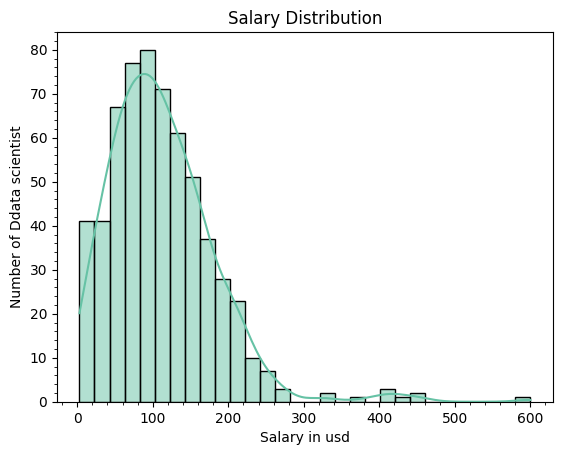

In [172]:
sns.histplot(df['salary_in_usd']/1000, bins=30, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary in usd')
plt.ylabel('Number of Ddata scientist')
plt.minorticks_on()

### observation:  
- Salary distribution is Right skwed
- have some outliers

In [173]:
df['salary_in_usd'] = df['salary_in_usd'] / 1000

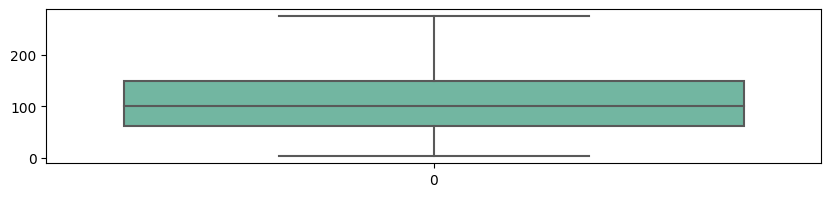

In [174]:
plt.figure(figsize=(10, 2))
sns.boxplot(df['salary_in_usd'], showfliers=False)

# Adding the value of the median.
median = np.median(df['salary_in_usd'])
plt.annotate(f'Median: {median:.0f}',
            xy=(median, -0.3), # The position of the item being signed.
            xytext=(median, -0.5), # The position of the signature.
            arrowprops=dict(facecolor='red', shrink=0)); # The format of the arrow.

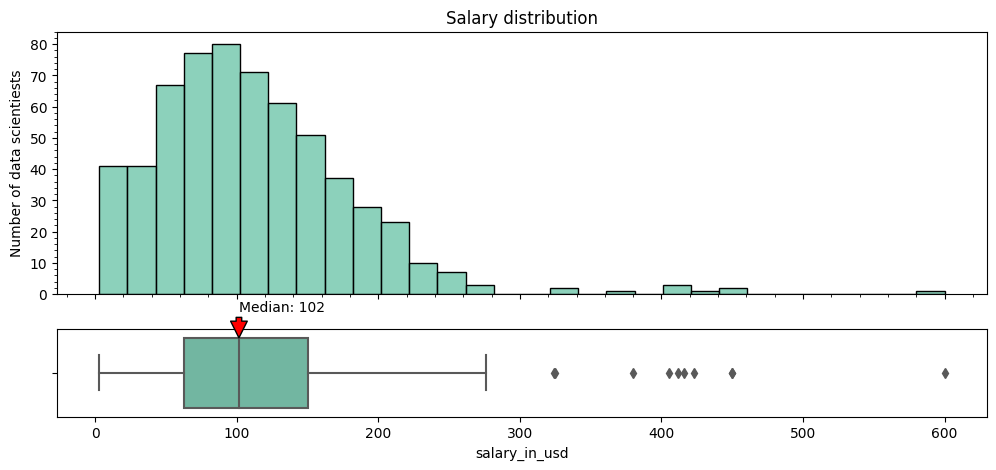

In [175]:
# create a subplot
fig, ax = plt.subplots(2, 1, figsize=(10, 2), gridspec_kw={'height_ratios': [3, 1]})
# 2 row, 1 col.
# fig is the figure object.
# axs is a NumPy array of subplot axes objects.
#  first grid cell will have a height three times that of the second grid cell.


# set the histogram in the first subplot
sns.histplot(ax=ax[0], data=df, x='salary_in_usd', bins=30)
ax[0].set(title='Salary distribution', ylabel='Number of data scientiests', xlabel='')
ax[0].set_xticklabels([])  # Hide the xlabels on the x axis
ax[0].minorticks_on()

# set the boxplot in the second subplot
sns.boxplot(ax=ax[1], data=df, x='salary_in_usd', showfliers=True)


# Adding the median value
median = np.median(df['salary_in_usd'])
plt.annotate(f'Median: {median:.0f}',
    xy = (median, -0.4),
    xytext = (median, -0.7),
    arrowprops = dict(facecolor = 'red', shrink=0)) # arrow format
#  formatted as a whole number (:.0f)
fig.set_size_inches(12, 5)
plt.show()

## >> Review 3:
- we can see that the median value is 102
- distribution is right skewed
- have some outliers(extream values) but not a much.

In [176]:
px.histogram(df, x='salary_in_usd', marginal='rug', title='<b> Salary Distribution')

# px.histogram(df, x = 'salary_in_usd' , marginal = 'rug' , template = 'ggplot2' , labels = {'salary_in_usd' : 'salary'} , title = '<b> Salary Distribution')

### observation:
- using this interactive plotly figure we can easyly understand the frequency of the data.

# 2. experience_lavel

## There are 4 categories in this attribute :

- EN - Entry-level / Junior
- MI - Mid-level / Intermediate
- SE - Senior-level / Expert
- EX -Executive-level / Director

In [177]:
counts = df['experience_level'].value_counts()
counts

Senior       280
Middle       213
Junior        88
Executive     26
Name: experience_level, dtype: int64

<Axes: ylabel='experience_level'>

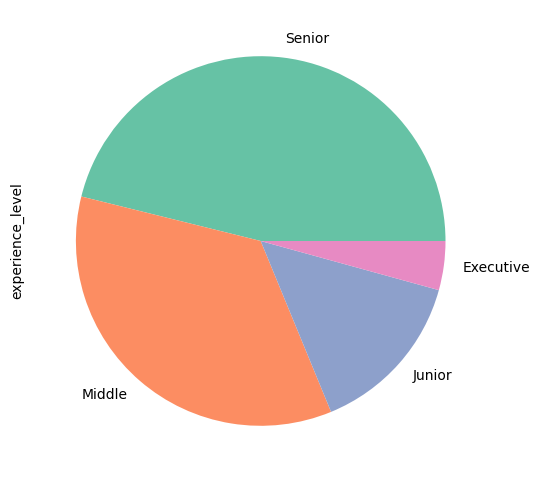

In [178]:
 df['experience_level'].value_counts().plot(kind='pie', figsize=(12,6))

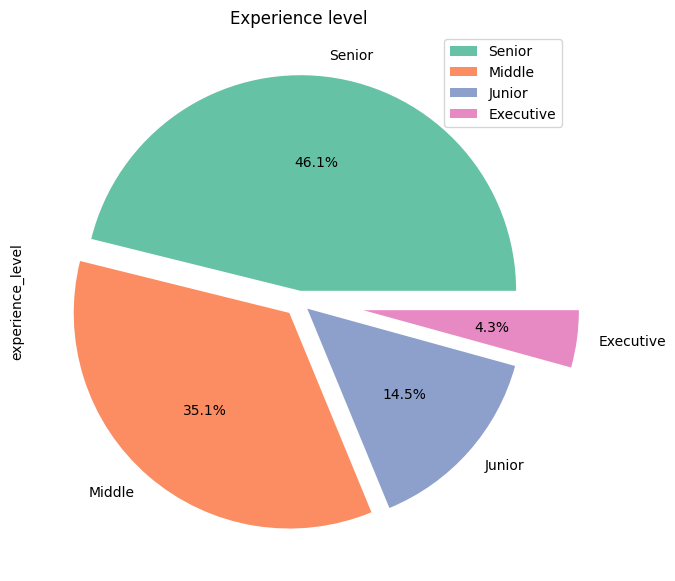

In [179]:
order = ['Junior', 'Middle', 'Senior', 'Executive']
plt.figure(figsize=(10,7))
counts.plot(kind='pie', autopct='%1.1f%%', explode=[0.05, 0.07, 0.05, 0.3])
plt.title('Experience level')
plt.legend(counts.index, loc='upper right', fontsize=10)

In [180]:
# donat chart
# Data Science jobs based on Experience level
fig = px.pie(df.groupby('experience_level' , as_index = False)['salary_in_usd'].count().sort_values(by = 'salary_in_usd' , ascending = False),
            names = 'experience_level' , values = 'salary_in_usd' , color = 'experience_level' , hole = 0.7 ,
            labels = {'experience_level':'Experience Level' , 'salary_in_usd' : 'salary'} ,
            template = 'ggplot2' , title = '<b> Total Jobs based on Experience Level')
fig.update_layout(title_x = 0.5)
# fig.update_layout(title_x = 0.5 , legend = dict(orientation = 'v' , yanchor = 'bottom' , y = 1.02 , xanchor = 'right' , x = 1))

<Axes: >

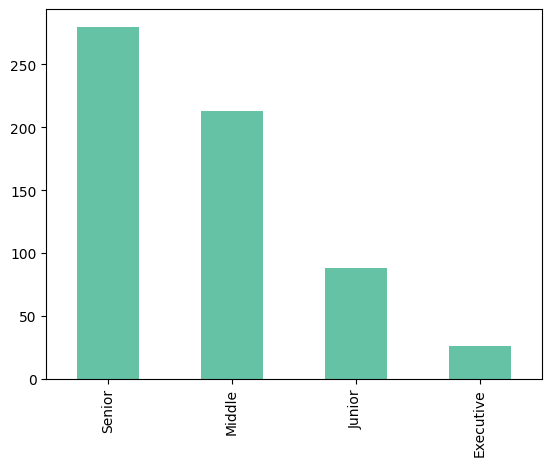

In [181]:
counts.plot(kind='bar')

Text(0.5, 1.0, 'Experience Level')

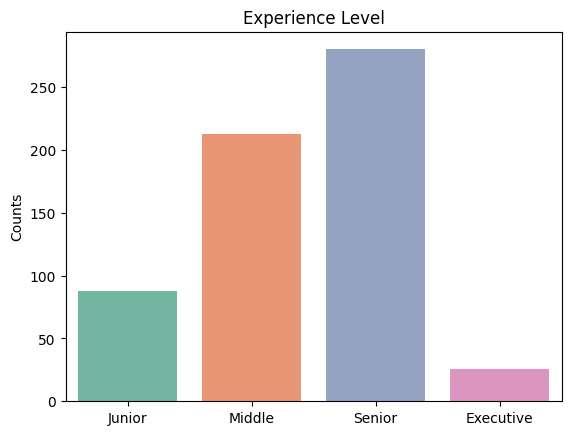

In [182]:
order = ['Junior', 'Middle', 'Senior', 'Executive']
counts.sort_index(inplace=True)
sns.barplot(x=counts.index, y=counts, order=order)
plt.ylabel('Counts')
plt.title('Experience Level')

#### Observation:
- for better visualization, some plots created here.
- from pie chart we can easyly understand the area & percentage properties consume.
- from Donat pie chart we can understand better with interactive figure.
- from bar chart we can identify the distribution & count of the feature
- We can see from the above pie chart & bar chart that senior level jobs mostly requires experience.

# 3. employment_type

In [183]:
df['employment_type'].unique()

array(['Full Time', 'Contract', 'Part Time', 'Freelance'], dtype=object)

In [184]:
counts = df['employment_type'].value_counts()
counts

Full Time    588
Part Time     10
Contract       5
Freelance      4
Name: employment_type, dtype: int64

Text(0.5, 1.0, 'Employment TYpe')

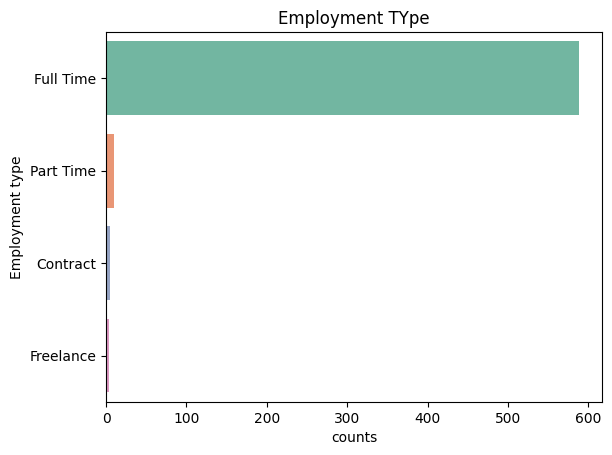

In [185]:
# bar chart
sns.barplot(x=counts.values, y=counts.index)
plt.xlabel('counts')
plt.ylabel('Employment type')
plt.title('Employment TYpe')

<Axes: ylabel='employment_type'>

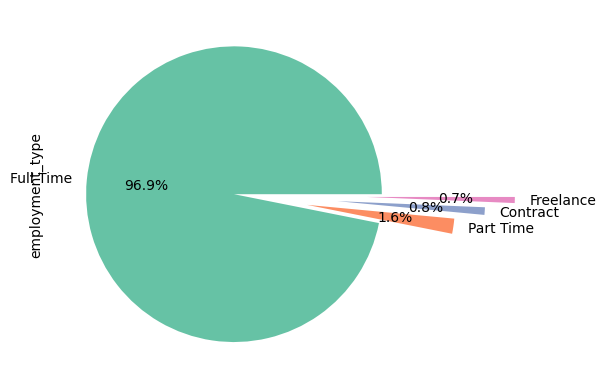

In [186]:
# pie chart
counts.plot(kind='pie', autopct='%0.1f%%', explode=[0,0.5,0.7,0.9])

In [187]:
# donat chart

# labels = ['Employment Type', 'Salary in USD']
fig = px.pie(df.groupby('employment_type', as_index=False)['salary_in_usd'].count().sort_values(by='salary_in_usd'),
             names='employment_type', values='salary_in_usd', color='employment_type', hole=0.6,
             labels=['Employment Type', 'Salary in USD'], template='seaborn', title='Data Science job based on salary')
fig.update_layout(title_x=0.5)

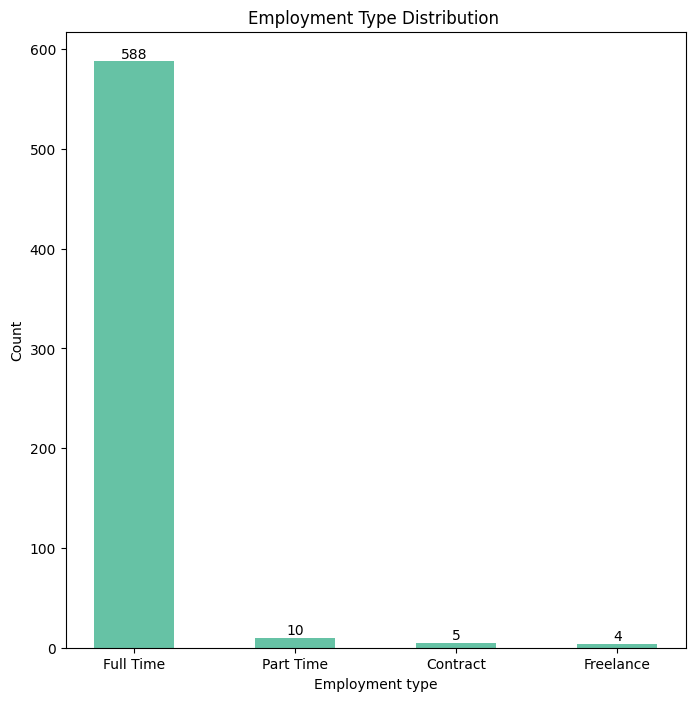

In [188]:
# bar chart with count
labels = df['employment_type'].value_counts().index.to_list()
values = df['employment_type'].value_counts().to_list()
# Plot Bar Chart
plt.figure(figsize=(8,8))
z = plt.bar(x=labels, height=values, width=0.5)
plt.bar_label(z, labels=values, label_type='edge')
plt.title('Employment Type Distribution ')
plt.xlabel('Employment type')
plt.ylabel('Count')
plt.show()

# Observation:
- We can see that 96.9% of the jobs are Full-time jobs.
- Contract and freelancing jobs are not given that much importance in Data Science.
- Part Time jobs are also rare.

# 4. job_title

### Cloud word of `job_title`

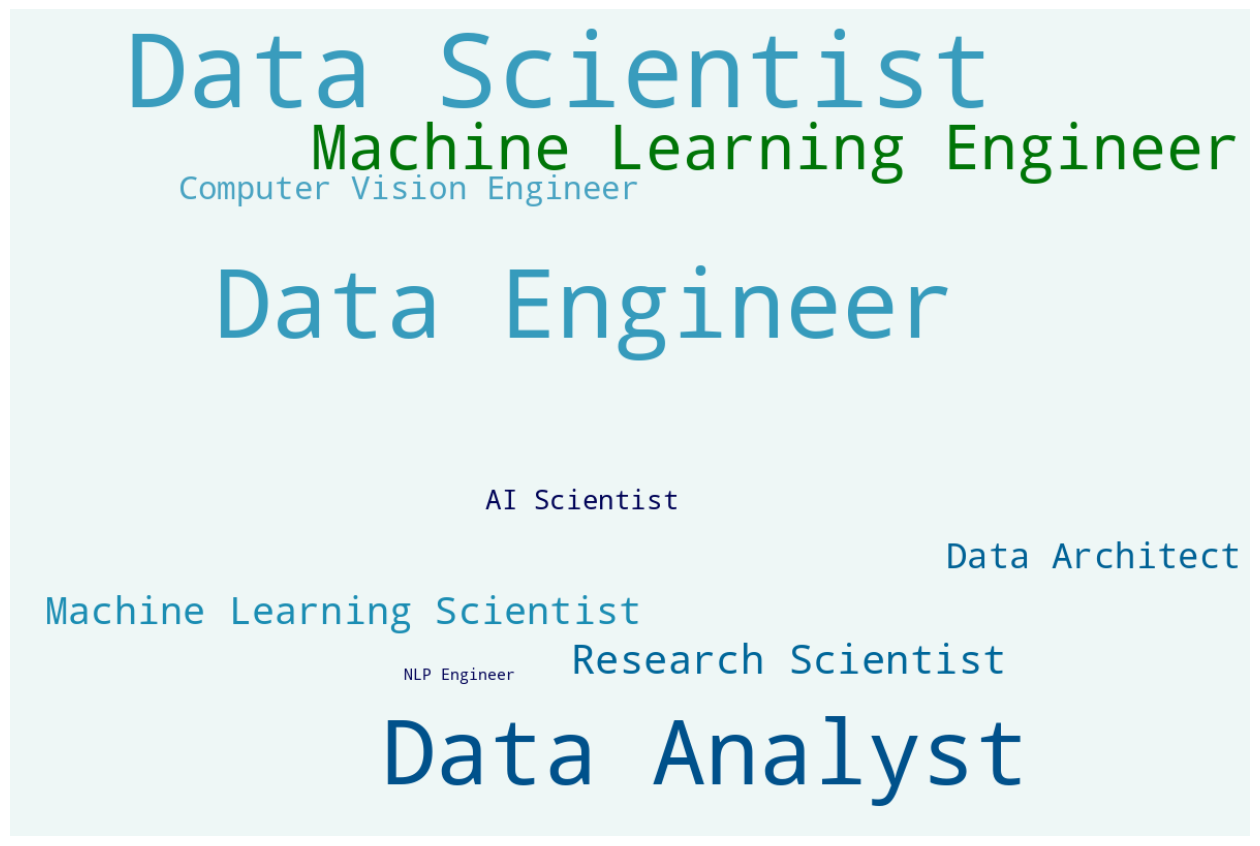

In [189]:
def frequency_df(wordlist):
    """
    Parameter: A list of type string.
    Returns: DataFrame with frequency distribution of strings.
    """
    freq_dist = nltk.FreqDist(wordlist)
    df_freq = pd.DataFrame.from_dict(freq_dist, orient='index')
    df_freq.columns = ['Frequency']
    df_freq.index.name = 'Title'
    df_freq = df_freq.sort_values(by=['Frequency'], ascending=False).reset_index()
    return df_freq

# Create data for WordCloud
wordlist = df['job_title'].values.tolist()
df_freq = frequency_df(wordlist)
data = dict(zip(df_freq['Title'].tolist(), df_freq['Frequency'].tolist()))
# Create WordCloud
plt.figure(figsize=(16, 12))
wc = WordCloud(width=1200,
              height=800,
              max_words=50,
              background_color='#EEF7F6',
              max_font_size=100,
              random_state=42,
              colormap='ocean').generate_from_frequencies(data)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### Observation:
- creating a cloud word shows us crealy the most frequents words (in this case:Title)
- The bigger the word, the the larger the frequency.

In [190]:
counts = df['job_title'].value_counts()
counts

Data Scientist                191
Data Engineer                 160
Data Analyst                  142
Machine Learning Engineer      54
Research Scientist             16
Machine Learning Scientist     14
Data Architect                 12
Computer Vision Engineer       10
AI Scientist                    7
NLP Engineer                    1
Name: job_title, dtype: int64

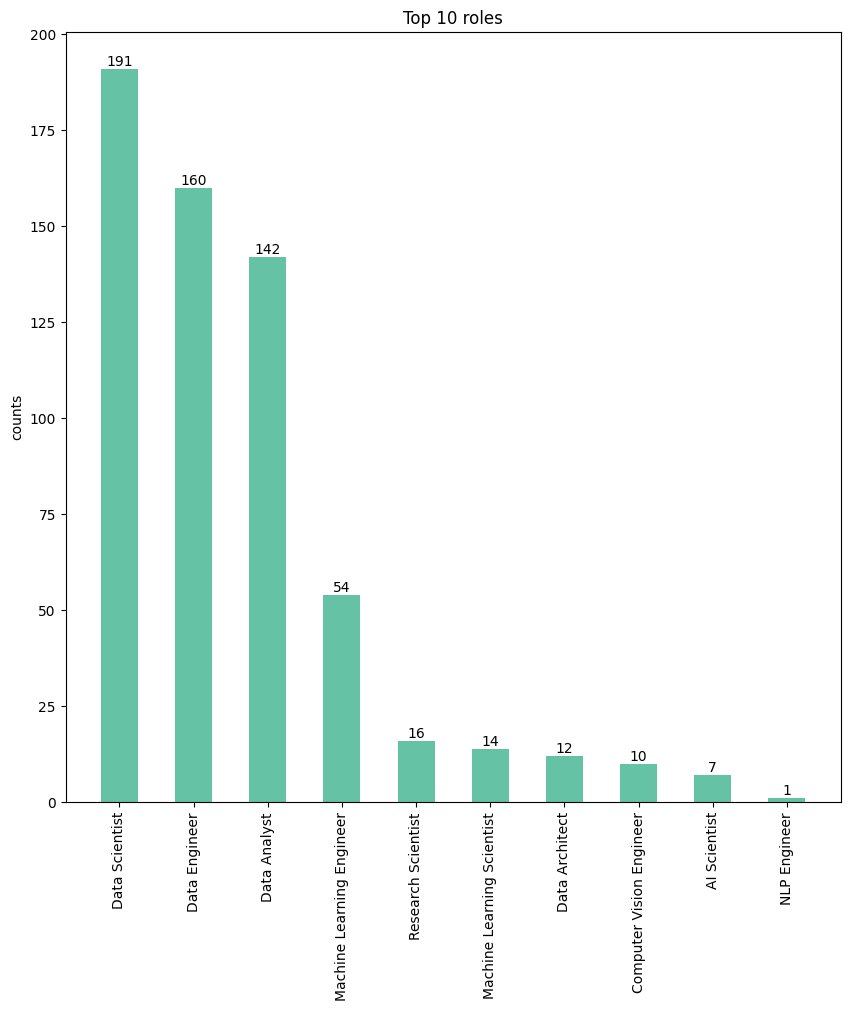

In [191]:
# top 10 roles who earns more
top_roles = df['job_title'].value_counts()[:10]
x = top_roles.index
y = top_roles.values

# plot bar chart
plt.figure(figsize=(10,10))
z = plt.bar(x, y, width=0.5)
# z = plt.bar(x=x, height=y, width=0.5)
plt.bar_label(z, labels=y)
# plt.bar_label(container=z, labels=y)
plt.title('Top 10 roles')
plt.ylabel('Job title')
plt.ylabel('counts')
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='job_title'>

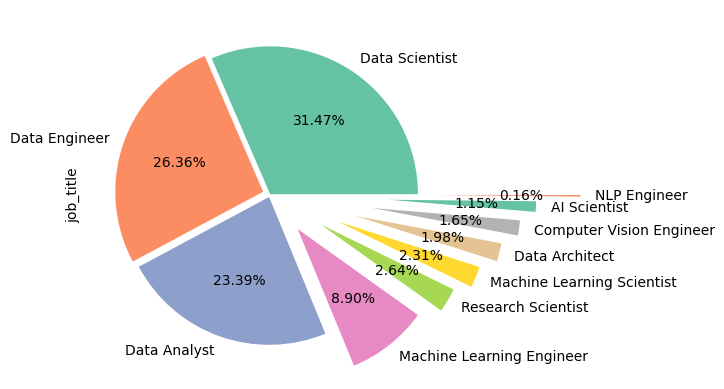

In [192]:
top_roles.plot(kind='pie', autopct='%0.2f%%', explode=[0,0.05,0.02,0.3,0.4,0.5,0.6,0.7,0.8,1.1])

Text(0.5, 1.0, 'Job title')

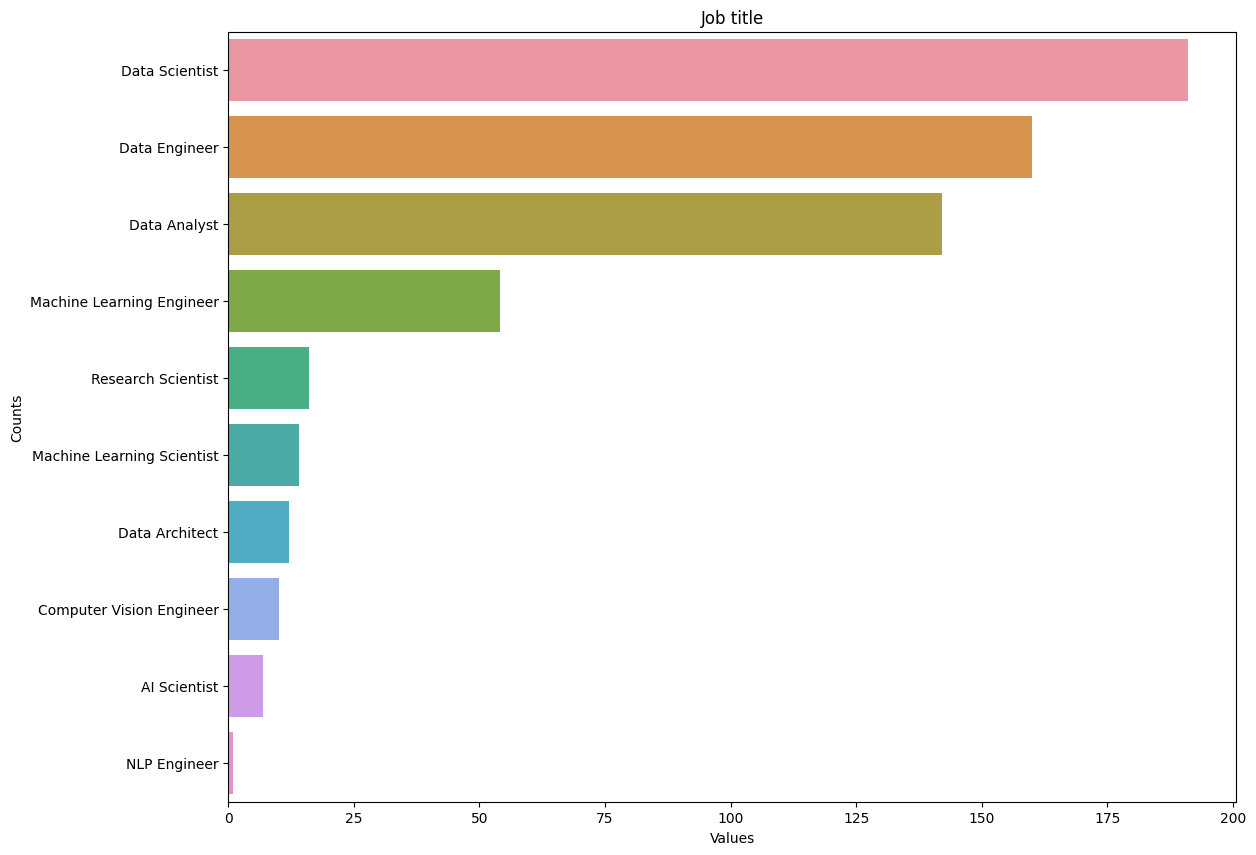

In [193]:
plt.figure(figsize=(13,10))
sns.barplot(x=counts.values, y=counts.index)  # orient='h'
plt.xlabel('Values')
plt.ylabel('Counts')
plt.title('Job title')

Text(0.5, 1.0, 'The relationship between Salary and Job title')

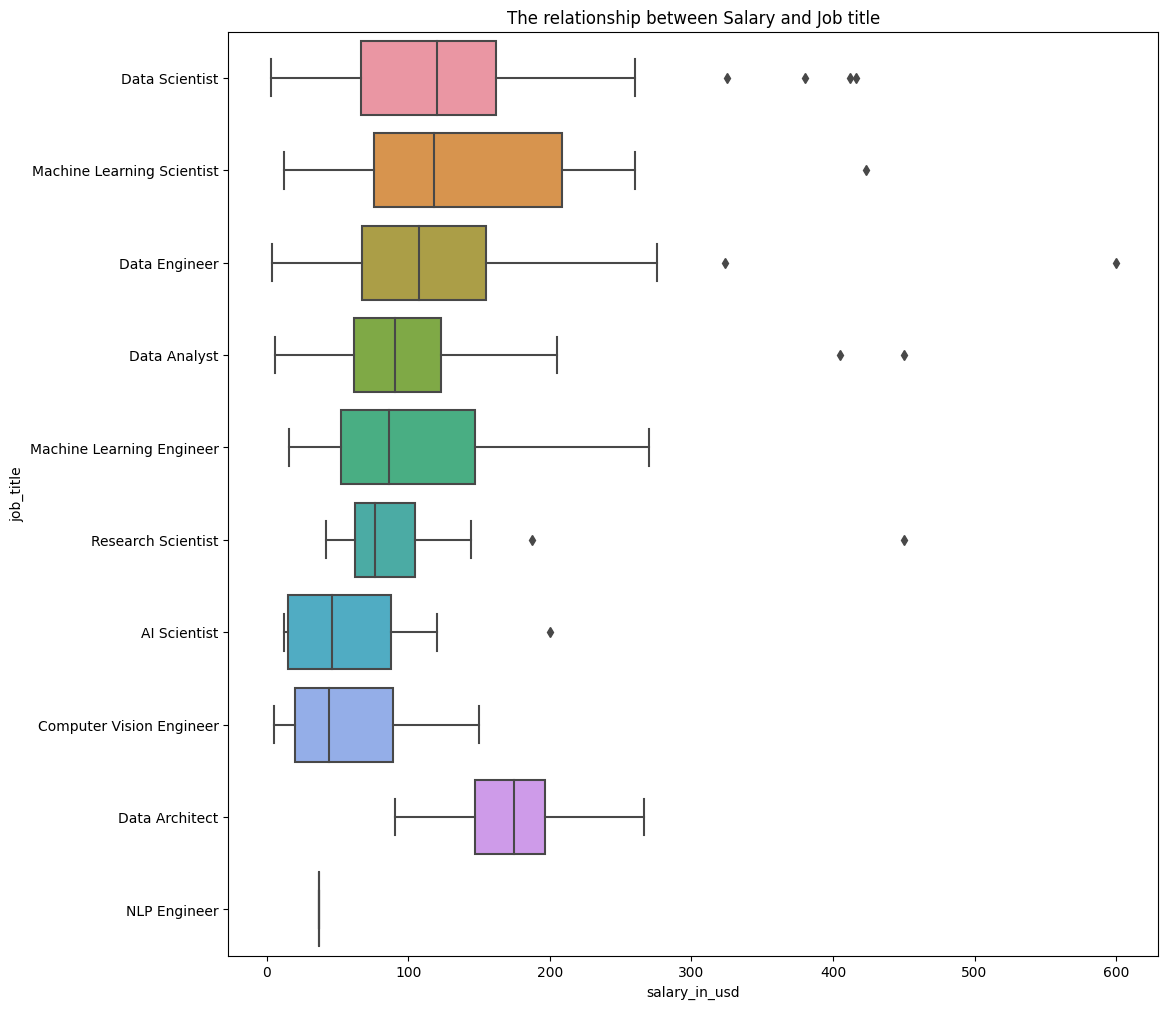

In [194]:
plt.figure(figsize=(12,12))
sns.boxplot(x=df['salary_in_usd'], y=df['job_title'], showfliers=True)
plt.title('The relationship between Salary and Job title')

### Observations:
## After Centralize we got 10 main job category.
  - Data Scientist                191
  - Data Engineer                 160
  - Data Analyst                  142
  - Machine Learning Engineer      54
  - Research Scientist             16
  - Machine Learning Scientist     14
  - Data Architect                 12
  - Computer Vision Engineer       10
  - AI Scientist                    7
  - NLP Engineer                    1
- Data Scientist's Average Salary gain top position.
- Machine learning Engneer's Salary got Second Position.

## From boxplot distribution we can see that below mentioned features got some outliers. they are:
  - Data Scientist                
  - Data Engineer                 
  - Data Analyst                  
  - Machine Learning Engineer      
  - Research Scientist             
  - Data Architect                 
  - Computer Vision Engineer       
  - AI Scientist     

# 5. Employee Residence and Company location

In [195]:
df['employee_residence'].unique()

array(['Germany', 'Japan', 'United Kingdom (Great Britain)', 'Honduras',
       'United States of America', 'Hungary', 'New Zealand', 'France',
       'India', 'Pakistan', 'Poland', 'Portugal', 'China', 'Greece',
       'United Arab Emirates', 'Netherlands', 'Mexico', 'Canada',
       'Austria', 'Nigeria', 'Philippines', 'Spain', 'Denmark',
       'Russian Federation', 'Italy', 'Croatia', 'Bulgaria', 'Singapore',
       'Brazil', 'Iraq', 'Viet Nam', 'Belgium', 'Ukraine', 'Malta',
       'Chile', 'Romania', 'Islamic Republic of Iran', 'Colombia',
       'Moldova, Republic of', 'Kenya', 'Slovenia', 'Hong Kong', 'Turkey',
       nan, 'Puerto Rico', 'Luxembourg', 'Czech Republic', 'Argentina',
       'Algeria', 'Tunisia', 'Malaysia', 'Estonia', 'Australia',
       'Bolivia', 'Ireland', 'Switzerland'], dtype=object)

In [196]:
df['employee_residence'].count()

605


ISO3166 = {
	'AD': 'Andorra',
	'AE': 'United Arab Emirates',
	'AF': 'Afghanistan',
	'AG': 'Antigua & Barbuda',
	'AI': 'Anguilla',
	'AL': 'Albania',
	'AM': 'Armenia',
	'AN': 'Netherlands Antilles',
	'AO': 'Angola',
	'AQ': 'Antarctica',
	'AR': 'Argentina',
	'AS': 'American Samoa',
	'AT': 'Austria',
	'AU': 'Australia',
	'AW': 'Aruba',
	'AZ': 'Azerbaijan',
	'BA': 'Bosnia and Herzegovina',
	'BB': 'Barbados',
	'BD': 'Bangladesh',
	'BE': 'Belgium',
	'BF': 'Burkina Faso',
	'BG': 'Bulgaria',
	'BH': 'Bahrain',
	'BI': 'Burundi',
	'BJ': 'Benin',
	'BM': 'Bermuda',
	'BN': 'Brunei Darussalam',
	'BO': 'Bolivia',
	'BR': 'Brazil',
	'BS': 'Bahama',
	'BT': 'Bhutan',
	'BU': 'Burma (no longer exists)',
	'BV': 'Bouvet Island',
	'BW': 'Botswana',
	'BY': 'Belarus',
	'BZ': 'Belize',
	'CA': 'Canada',
	'CC': 'Cocos (Keeling) Islands',
	'CF': 'Central African Republic',
	'CG': 'Congo',
	'CH': 'Switzerland',
	'CI': 'Côte D\'ivoire (Ivory Coast)',
	'CK': 'Cook Iislands',
	'CL': 'Chile',
	'CM': 'Cameroon',
	'CN': 'China',
	'CO': 'Colombia',
	'CR': 'Costa Rica',
	'CS': 'Czechoslovakia (no longer exists)',
	'CU': 'Cuba',
	'CV': 'Cape Verde',
	'CX': 'Christmas Island',
	'CY': 'Cyprus',
	'CZ': 'Czech Republic',
	'DD': 'German Democratic Republic (no longer exists)',
	'DE': 'Germany',
	'DJ': 'Djibouti',
	'DK': 'Denmark',
	'DM': 'Dominica',
	'DO': 'Dominican Republic',
	'DZ': 'Algeria',
	'EC': 'Ecuador',
	'EE': 'Estonia',
	'EG': 'Egypt',
	'EH': 'Western Sahara',
	'ER': 'Eritrea',
	'ES': 'Spain',
	'ET': 'Ethiopia',
	'FI': 'Finland',
	'FJ': 'Fiji',
	'FK': 'Falkland Islands (Malvinas)',
	'FM': 'Micronesia',
	'FO': 'Faroe Islands',
	'FR': 'France',
	'FX': 'France, Metropolitan',
	'GA': 'Gabon',
	'GB': 'United Kingdom (Great Britain)',
	'GD': 'Grenada',
	'GE': 'Georgia',
	'GF': 'French Guiana',
	'GH': 'Ghana',
	'GI': 'Gibraltar',
	'GL': 'Greenland',
	'GM': 'Gambia',
	'GN': 'Guinea',
	'GP': 'Guadeloupe',
	'GQ': 'Equatorial Guinea',
	'GR': 'Greece',
	'GS': 'South Georgia and the South Sandwich Islands',
	'GT': 'Guatemala',
	'GU': 'Guam',
	'GW': 'Guinea-Bissau',
	'GY': 'Guyana',
	'HK': 'Hong Kong',
	'HM': 'Heard & McDonald Islands',
	'HN': 'Honduras',
	'HR': 'Croatia',
	'HT': 'Haiti',
	'HU': 'Hungary',
	'ID': 'Indonesia',
	'IE': 'Ireland',
	'IL': 'Israel',
	'IN': 'India',
	'IO': 'British Indian Ocean Territory',
	'IQ': 'Iraq',
	'IR': 'Islamic Republic of Iran',
	'IS': 'Iceland',
	'IT': 'Italy',
	'JM': 'Jamaica',
	'JO': 'Jordan',
	'JP': 'Japan',
	'KE': 'Kenya',
	'KG': 'Kyrgyzstan',
	'KH': 'Cambodia',
	'KI': 'Kiribati',
	'KM': 'Comoros',
	'KN': 'St. Kitts and Nevis',
	'KP': 'Korea, Democratic People\'s Republic of',
	'KR': 'Korea, Republic of',
	'KW': 'Kuwait',
	'KY': 'Cayman Islands',
	'KZ': 'Kazakhstan',
	'LA': 'Lao People\'s Democratic Republic',
	'LB': 'Lebanon',
	'LC': 'Saint Lucia',
	'LI': 'Liechtenstein',
	'LK': 'Sri Lanka',
	'LR': 'Liberia',
	'LS': 'Lesotho',
	'LT': 'Lithuania',
	'LU': 'Luxembourg',
	'LV': 'Latvia',
	'LY': 'Libyan Arab Jamahiriya',
	'MA': 'Morocco',
	'MC': 'Monaco',
	'MD': 'Moldova, Republic of',
	'MG': 'Madagascar',
	'MH': 'Marshall Islands',
	'ML': 'Mali',
	'MN': 'Mongolia',
	'MM': 'Myanmar',
	'MO': 'Macau',
	'MP': 'Northern Mariana Islands',
	'MQ': 'Martinique',
	'MR': 'Mauritania',
	'MS': 'Monserrat',
	'MT': 'Malta',
	'MU': 'Mauritius',
	'MV': 'Maldives',
	'MW': 'Malawi',
	'MX': 'Mexico',
	'MY': 'Malaysia',
	'MZ': 'Mozambique',
	'NA': 'Namibia',
	'NC': 'New Caledonia',
	'NE': 'Niger',
	'NF': 'Norfolk Island',
	'NG': 'Nigeria',
	'NI': 'Nicaragua',
	'NL': 'Netherlands',
	'NO': 'Norway',
	'NP': 'Nepal',
	'NR': 'Nauru',
	'NT': 'Neutral Zone (no longer exists)',
	'NU': 'Niue',
	'NZ': 'New Zealand',
	'OM': 'Oman',
	'PA': 'Panama',
	'PE': 'Peru',
	'PF': 'French Polynesia',
	'PG': 'Papua New Guinea',
	'PH': 'Philippines',
	'PK': 'Pakistan',
	'PL': 'Poland',
	'PM': 'St. Pierre & Miquelon',
	'PN': 'Pitcairn',
	'PR': 'Puerto Rico',
	'PT': 'Portugal',
	'PW': 'Palau',
	'PY': 'Paraguay',
	'QA': 'Qatar',
	'RE': 'Réunion',
	'RO': 'Romania',
	'RU': 'Russian Federation',
	'RW': 'Rwanda',
	'SA': 'Saudi Arabia',
	'SB': 'Solomon Islands',
	'SC': 'Seychelles',
	'SD': 'Sudan',
	'SE': 'Sweden',
	'SG': 'Singapore',
	'SH': 'St. Helena',
	'SI': 'Slovenia',
	'SJ': 'Svalbard & Jan Mayen Islands',
	'SK': 'Slovakia',
	'SL': 'Sierra Leone',
	'SM': 'San Marino',
	'SN': 'Senegal',
	'SO': 'Somalia',
	'SR': 'Suriname',
	'ST': 'Sao Tome & Principe',
	'SU': 'Union of Soviet Socialist Republics (no longer exists)',
	'SV': 'El Salvador',
	'SY': 'Syrian Arab Republic',
	'SZ': 'Swaziland',
	'TC': 'Turks & Caicos Islands',
	'TD': 'Chad',
	'TF': 'French Southern Territories',
	'TG': 'Togo',
	'TH': 'Thailand',
	'TJ': 'Tajikistan',
	'TK': 'Tokelau',
	'TM': 'Turkmenistan',
	'TN': 'Tunisia',
	'TO': 'Tonga',
	'TP': 'East Timor',
	'TR': 'Turkey',
	'TT': 'Trinidad & Tobago',
	'TV': 'Tuvalu',
	'TW': 'Taiwan, Province of China',
	'TZ': 'Tanzania, United Republic of',
	'UA': 'Ukraine',
	'UG': 'Uganda',
	'UM': 'United States Minor Outlying Islands',
	'US': 'United States of America',
	'UY': 'Uruguay',
	'UZ': 'Uzbekistan',
	'VA': 'Vatican City State (Holy See)',
	'VC': 'St. Vincent & the Grenadines',
	'VE': 'Venezuela',
	'VG': 'British Virgin Islands',
	'VI': 'United States Virgin Islands',
	'VN': 'Viet Nam',
	'VU': 'Vanuatu',
	'WF': 'Wallis & Futuna Islands',
	'WS': 'Samoa',
	'YD': 'Democratic Yemen (no longer exists)',
	'YE': 'Yemen',
	'YT': 'Mayotte',
	'YU': 'Yugoslavia',
	'ZA': 'South Africa',
	'ZM': 'Zambia',
	'ZR': 'Zaire',
	'ZW': 'Zimbabwe',
	'ZZ': 'Unknown or unspecified country',
}

### In below code, we actualy done a Bivariate analysis for better understanding and insite.

In [197]:
result = df.groupby('company_location').agg({'salary_in_usd':['mean', 'median'], 'company_location':'count'})
result = result.round(2)
result

salary_in_usd         company_location
                                        mean  median            count
company_location                                                     
Algeria                               100.00  100.00                1
American Samoa                         18.05   18.05                1
Australia                             108.04   87.42                3
Austria                                72.92   69.49                4
Belgium                                85.70   85.70                2
Brazil                                 18.60   18.91                3
Canada                                 99.82   81.90               30
Chile                                  40.04   40.04                1
China                                  71.67   71.67                2
Colombia                               21.84   21.84                1
Croatia                                45.62   45.62                1
Czech Republic                         50.94   50.94                2
Denmark                                54.39   45.90                3
Estonia                                32.97   32.97                1
France                                 63.97   56.74               15
Germany                                81.89   78.02               28
Greece                                 52.29   49.46               11
Honduras                               20.00   20.00                1
Hungary                                35.74   35.74                1
India                                  28.58   22.12               24
Iraq                                  100.00  100.00                1
Ireland                                71.44   71.44                1
Islamic Republic of Iran                4.00    4.00                1
Israel                                119.06  119.06                1
Italy                                  36.37   36.37                2
Japan                                 114.13   75.68                6
Kenya                                   9.27    9.27                1
Luxembourg                             43.94   59.10                3
Malaysia                               40.00   40.00                1
Malta                                  28.37   28.37                1
Mexico                                 32.12   33.51                3
Moldova, Republic of                   18.00   18.00                1
Netherlands                            54.95   54.02                4
New Zealand                           125.00  125.00                1
Nigeria                                30.00   30.00                2
Pakistan                               13.33   12.00                3
Poland                                 66.08   41.09                4
Portugal                               47.79   54.22                4
Romania                                60.00   60.00                1
Russian Federation                    157.50  157.50                2
Singapore                              89.29   89.29                1
Slovenia                               63.83   63.83                2
Spain                                  53.06   48.37               14
Switzerland                            64.11   64.11                2
Turkey                                 20.10   20.17                3
Ukraine                                13.40   13.40                1
United Arab Emirates                  100.00  115.00                3
United Kingdom (Great Britain)         81.58   78.53               47
United States of America              144.06  135.00              355
Viet Nam                                4.00    4.00                1

In [198]:
result.columns

MultiIndex([(   'salary_in_usd',   'mean'),
            (   'salary_in_usd', 'median'),
            ('company_location',  'count')],
           )

In [199]:
result.columns = ['_'.join(col).strip() for col in result.columns.values]
result = result.reset_index()
result

,company_location,salary_in_usd_mean,salary_in_usd_median,company_location_count
0,Algeria,100.00,100.00,1
1,American Samoa,18.05,18.05,1
2,Australia,108.04,87.42,3
3,Austria,72.92,69.49,4
4,Belgium,85.70,85.70,2
5,Brazil,18.60,18.91,3
6,Canada,99.82,81.90,30
7,Chile,40.04,40.04,1
8,China,71.67,71.67,2
9,Colombia,21.84,21.84,1


In [200]:
# df['company_location'].value_counts().nlargest(5).plot(kind='bar', title='Top 5 Data science Locations in World')

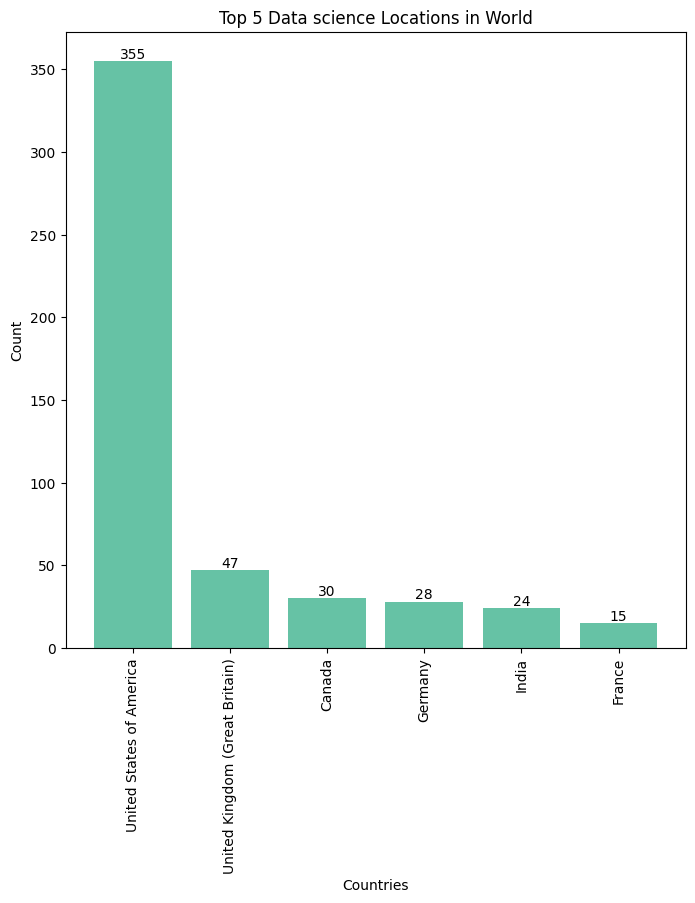

In [201]:
# Get data for top 5 countries showing the count number
country = df['company_location'].value_counts().index.to_list()
val = df['company_location'].value_counts().to_list()
top_5_cont = country[:6]
top_5_val = val[:6]
# Plot bar chart
plt.figure(figsize=(8,8))
z = plt.bar(x=top_5_cont, height=top_5_val)
plt.bar_label(z, labels=top_5_val)
plt.title('Top 5 Data science Locations in World')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=90)
# plt.ylim(0, 380)
plt.show()

In [202]:
# Top 15 countries having maximum Data Science Jobs
px.funnel(df.groupby('company_location' , as_index = False)['employment_type'].count().sort_values(by = 'employment_type', ascending = False)[:15],
         y = 'company_location' , x = 'employment_type', color_discrete_sequence=['red'],
         template = 'seaborn' , title = '<b> Top 15 countries having maximum Data Science Jobs')

#### Observations:
- Maximum Data Domain Jobs seen in the USA.
- Then UK, Canada, Germany, India, France and so on

# 6. Remote ratio

## Remote ratio has following possible values:

- 0: No remote work (less than 20%)
- 50: Partially Remote work
- 100: Fully remote (more than 80%)

In [203]:
df['remote_ratio'].unique()

array(['On Site', 'Partially Remote', 'Fully Remote'], dtype=object)

In [204]:
df['remote_ratio'].value_counts()

Fully Remote        381
On Site             127
Partially Remote     99
Name: remote_ratio, dtype: int64

Text(0, 0.5, '')

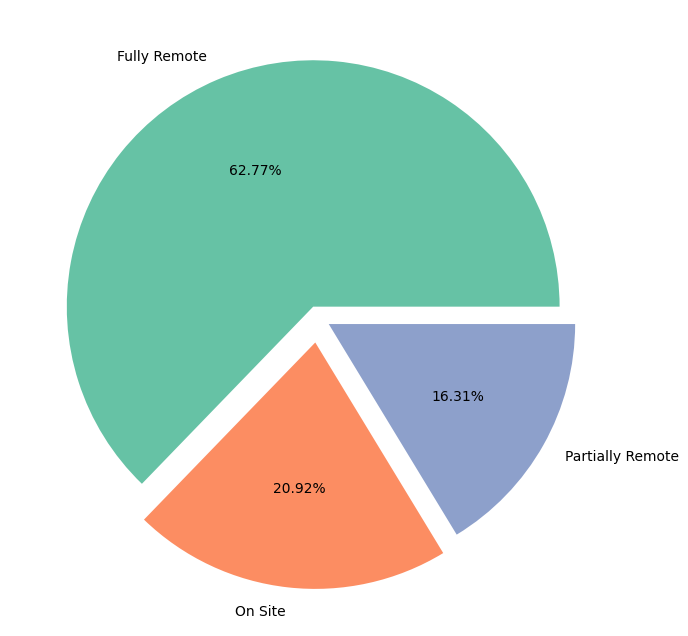

In [205]:
plt.figure(figsize=(13,8))
df['remote_ratio'].value_counts().plot(kind='pie', explode=[0.05, 0.1, 0.05], autopct='%0.2f%%')
plt.ylabel('')

In [206]:
# df['remote_ratio'].value_counts().plot(kind='bar')
# plt.minorticks_on()

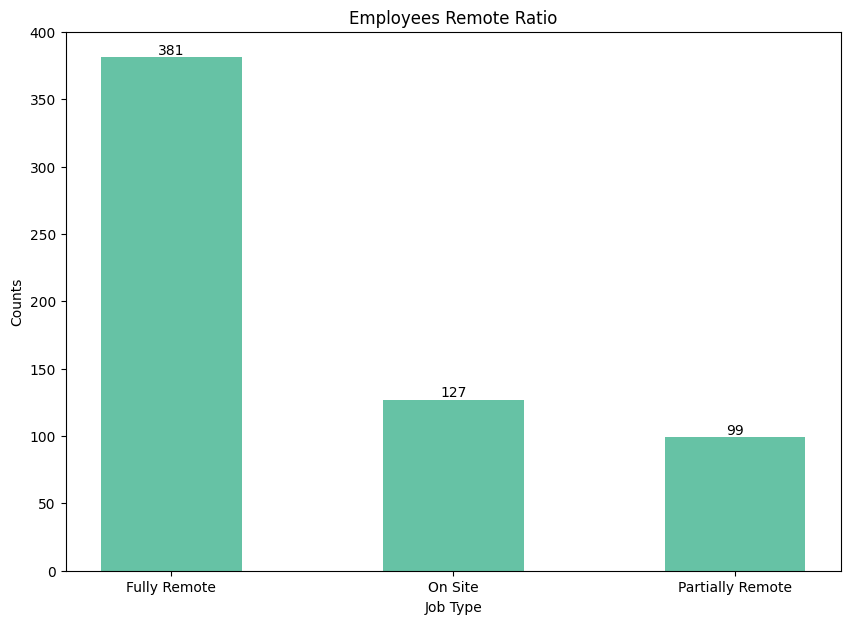

In [207]:
labels = ['Fully Remote', 'On Site', 'Partially Remote']
values = df['remote_ratio'].value_counts().to_list()
# values = df['remote_ratio'].value_counts()

# plot bar chart
plt.figure(figsize=(10,7))
z = plt.bar(labels, values, width=0.5, tick_label = labels)
plt.bar_label(z, labels = values)
plt.title('Employees Remote Ratio')
plt.xlabel('Job Type')
plt.ylabel('Counts')
plt.show()

##### Observation:
- Fully Remote job type ratio is way more than other types.
- Then On-Site job type
- Lastly, Partially or Hybrid job type.

# Bivariate Analysis

## Work Year and Remote Ratio

In [208]:
remote_by_year = df.groupby(['work_year', 'remote_ratio']).agg({'remote_ratio': pd.Series.count}).rename({'remote_ratio': 'count'}, axis=1)
remote_by_year = remote_by_year.reset_index()
remote_by_year

,work_year,remote_ratio,count
0,2020,Fully Remote,36
1,2020,On Site,15
2,2020,Partially Remote,21
3,2021,Fully Remote,117
4,2021,On Site,34
5,2021,Partially Remote,66
6,2022,Fully Remote,228
7,2022,On Site,78
8,2022,Partially Remote,12


In [209]:
px.bar(remote_by_year, x='work_year', y='count', color='remote_ratio', labels={'work_year':'Work Year', 'count':'Count'},
       title='<b> Work Year and Remote Ratio')

# px.bar(remote_by_year, x='work_year', y='count', color='remote_ratio',
#        barmode="group", title="Number of Modes over Years", labels={'work_year':'Year', "count": "Count"})

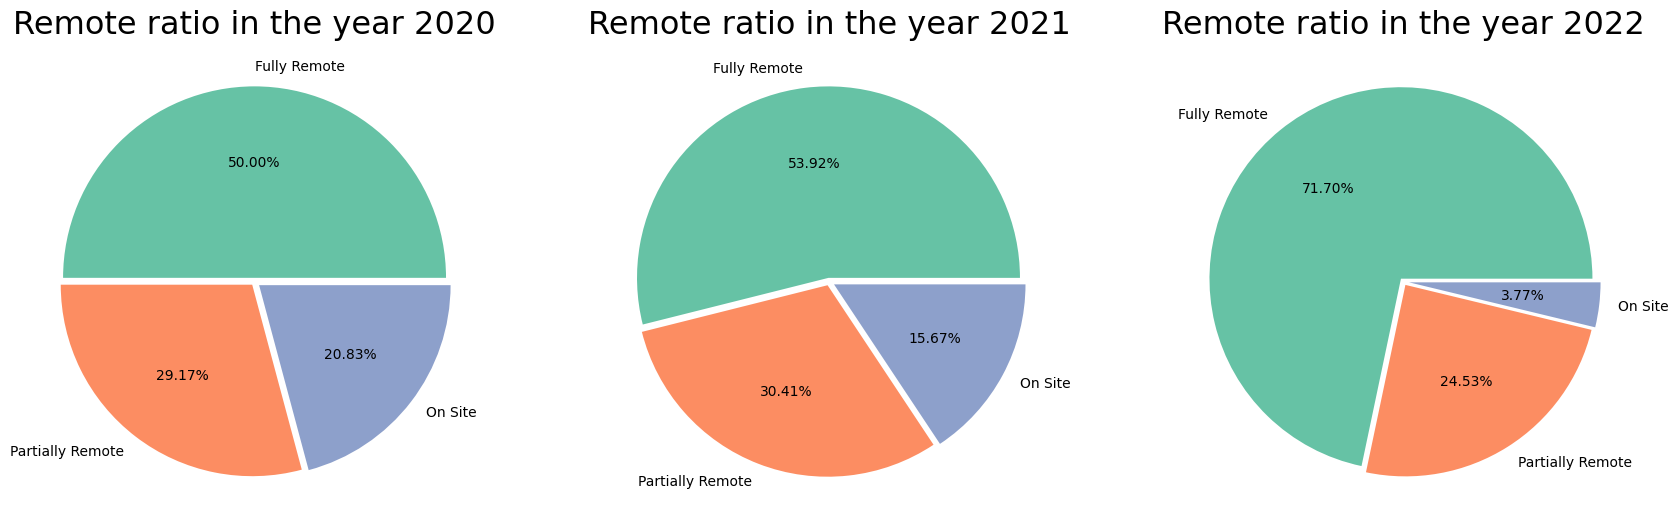

In [210]:
labels = ['Fully Remote', 'Partially Remote', 'On Site']
explode = [0.02, 0.02, 0.03]
fig, ax = plt.subplots(figsize=(21,14),  nrows=1, ncols=3)
ax[0].pie(df[df['work_year'] == 2020].remote_ratio.value_counts(), labels=labels, autopct = '%0.2f%%', explode=explode)
ax[0].set_title('Remote ratio in the year 2020', fontdict={'fontsize':23})
ax[1].pie(df[df['work_year'] == 2021].remote_ratio.value_counts(), labels=labels, autopct = '%0.2f%%', explode=explode)
ax[1].set_title('Remote ratio in the year 2021', fontdict={'fontsize':23})
ax[2].pie(df[df['work_year'] == 2022].remote_ratio.value_counts(), labels=labels, autopct = '%0.2f%%', explode=explode)
ax[2].set_title('Remote ratio in the year 2022', fontdict={'fontsize':23})
plt.show()

#### objervation:
- Fully Remote ratio Increased each year.
- Partially or Hybrid ratio Increased in 2021 year but decreased 2020.
- On Site ratio decreased each year.

#### Relationship between salary and work year

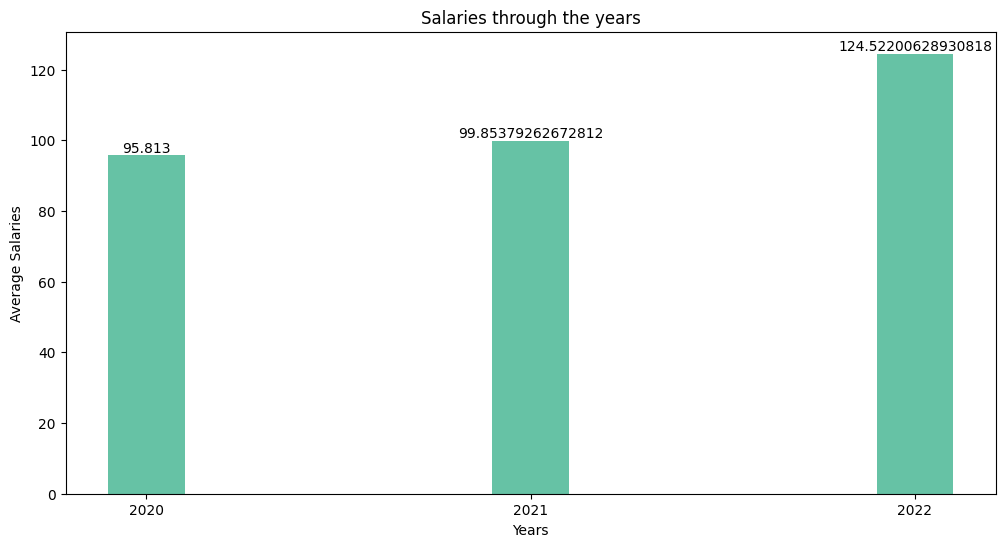

In [211]:
years_avg = [df[df['work_year'] == 2020].salary_in_usd.mean(),
            df[df['work_year'] == 2021].salary_in_usd.mean(),
            df[df['work_year'] == 2022].salary_in_usd.mean()]
values = years_avg
labels = ['2020','2021','2022']

plt.figure(figsize=(12,6))
z = plt.bar(labels, values, width=0.2)
plt.bar_label(z, labels=values)
plt.title('Salaries through the years')
plt.xlabel('Years')
plt.ylabel('Average Salaries')
plt.show()



In [212]:
px.box(df,x='work_year',y='salary_in_usd',color='work_year',labels={'work_year':'year','salary_in_usd':'salary in usd'},
          template='seaborn',title='<b>Data Science Salaries by year')

# px.violin(df,x='work_year',y='salary_in_usd',color='work_year',labels={'work_year':'year','salary_in_usd':'salary in usd'},
#           template='seaborn',title='<b>Data Science Salaries by year')

### observation:
- Average salaries increased each year

#### Relationship between Salary and company size

In [213]:
df['company_size'].unique()

array(['Large', 'Small', 'Medium'], dtype=object)

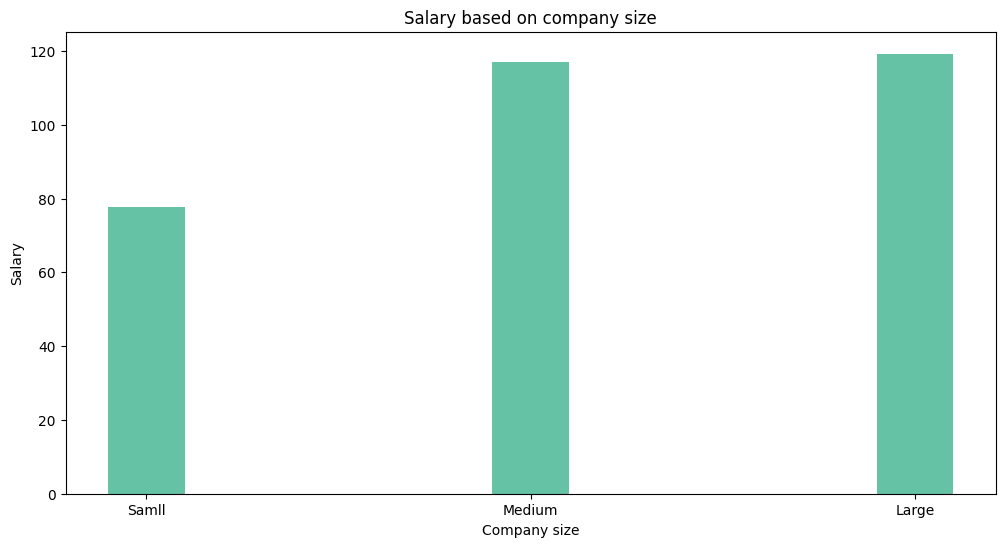

In [214]:
years_avg = [df[df['company_size'] == 'Small'].salary_in_usd.mean(),
            df[df['company_size'] == 'Medium'].salary_in_usd.mean(),
            df[df['company_size'] == 'Large'].salary_in_usd.mean()]
plt.figure(figsize=(12,6))
plt.title('Salary based on company size')
plt.bar(x=['Samll','Medium','Large'], height=years_avg, width=0.2)
plt.xlabel('Company size')
plt.ylabel('Salary')
plt.show()

### observation:
- comparetively Larger comapany pays more salary.

#### Job Types and Experience Level distributions

Text(0, 0.5, '')

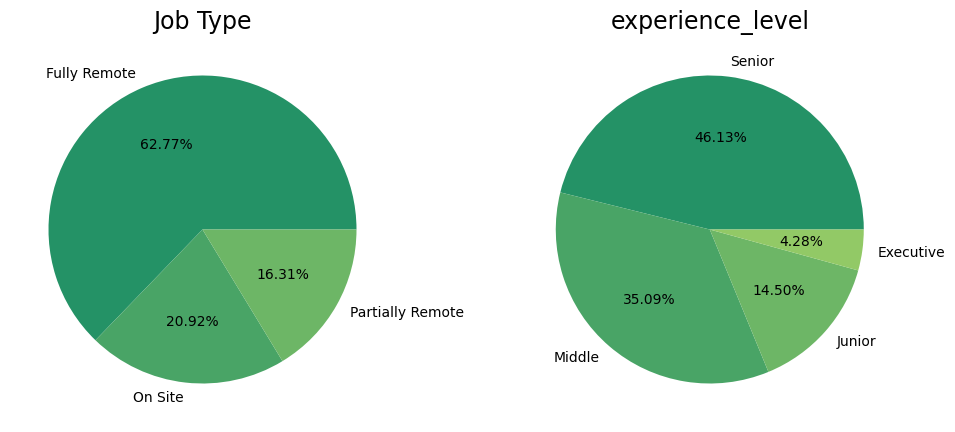

In [215]:
plt.figure(figsize=(12,5))
sns.set_palette('summer')

# job type
plt.subplot(1,2,1)
ax = df['remote_ratio'].value_counts().plot(kind='pie', autopct='%0.2f%%')
ax.set_title('Job Type', fontdict={'fontsize':17})
ax.set_ylabel('')

# Experience level
plt.subplot(1,2,2)
ax = df['experience_level'].value_counts().plot(kind='pie', autopct='%0.2f%%')
ax.set_title('experience_level', fontdict={'fontsize':17})
ax.set_ylabel('')

### Observation:
- Fully Remote job has the highest number of job opening.
- Senior level job has the highest number of job opening.

#### relationship between Salary and employment_type

In [216]:
counts = df['employment_type'].value_counts()
counts

Full Time    588
Part Time     10
Contract       5
Freelance      4
Name: employment_type, dtype: int64

Text(0.5, 1.0, 'The relationship between Salary and employment_type')

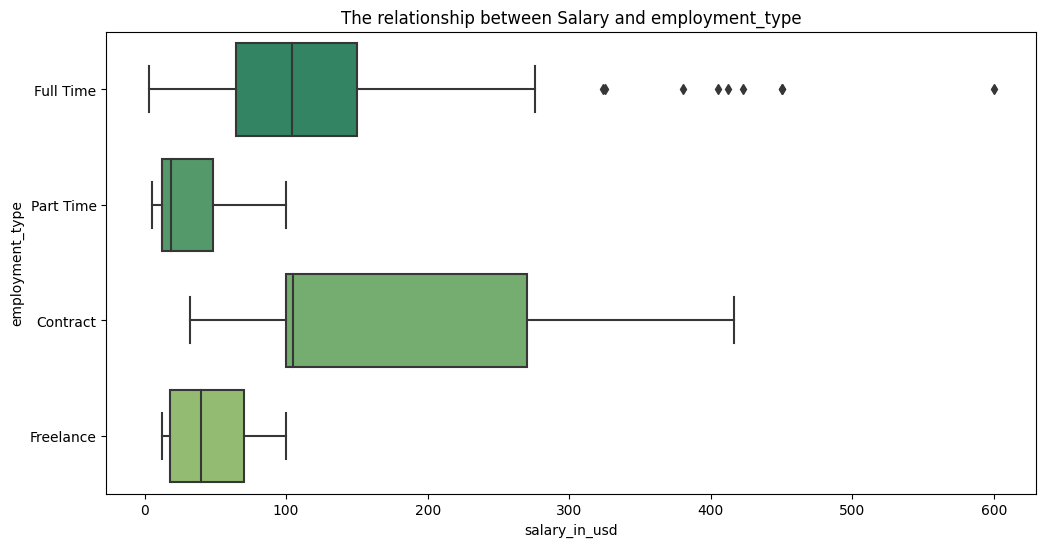

In [217]:
order = counts.index
plt.figure(figsize=(12,6))
sns.boxplot(x=df['salary_in_usd'], y=df['employment_type'], showfliers=True, order=order)
plt.title('The relationship between Salary and employment_type')

In [218]:
# figure in plotly
px.box(df, x='salary_in_usd', y='employment_type', color='employment_type', template='seaborn',
          labels={'employment_type':'Employment Type', 'salary_in_usd': 'Salari in USD'}, title='<b> Data Sceince Salaries by type of employment')

In [219]:
df.groupby('employment_type')['salary_in_usd'].mean()

employment_type
Contract     184.575000
Freelance     48.000000
Full Time    113.468073
Part Time     33.070500
Name: salary_in_usd, dtype: float64

#### Observation:
- Contract based employee get higher amaunt Average salay Then the Full time, Freelance and part time based employee.
- Some full time based employee gets higher amount than others.
- we can see some outliers in Full time based employee because they get a much more amount than others.


#### Top 10 Roles in Data Science based on Average Pay

In [220]:
top10_salary = df.groupby('job_title')['salary_in_usd'].mean().nlargest(10)
top10_salary

job_title
Data Architect                171.359667
Machine Learning Scientist    145.122714
Data Scientist                122.261571
Data Engineer                 115.047869
Research Scientist            109.019500
Machine Learning Engineer     104.704796
Data Analyst                   97.400894
AI Scientist                   66.135571
Computer Vision Engineer       58.767100
NLP Engineer                   37.236000
Name: salary_in_usd, dtype: float64

In [221]:
# top10_salary.plot(kind='bar')
# plt.show()

In [222]:
# showing salaries with bar

# labels = ['Data Architect','Machine Learning Scientist','Data Scientist','Data Engineer','Research Scientist']
# labels = top10_salary.index
# values = round(top10_salary, 2)
# plt.figure(figsize=(10,7))
# z = plt.bar(labels, values, width=0.2, tick_label=labels)
# plt.bar_label(z, labels=values)
# plt.title('top 10 Average salaries')
# plt.xlabel('Job title')
# plt.ylabel('salaries')
# plt.xticks(rotation=90)
# plt.show()


In [223]:
# using plotly
# Top 10 Roles in Data Science based on Average Pay

px.bar(round(df.groupby('job_title', as_index=False)['salary_in_usd'].mean().sort_values(by='salary_in_usd', ascending=False)[:10], 2),
       x='job_title', y='salary_in_usd', color='job_title',
       labels = {'job_title':'Job title' , 'salary_in_usd':'Salary in USD'},
       text='salary_in_usd', template = 'seaborn' , title = '<b>Top 10 roles in Data Science role according to Average salary')

#### Observation:
- Average Salary of Data Architech is Higher than others.

#### top 10 popular Data science role

In [224]:
# top 10 popular Data science role
top10 = df['job_title'].value_counts()[:10]
px.bar(x=top10.index, y=top10.values, color=top10.index, text=top10.values, template='seaborn',
       labels={'x':'Job Title', 'y':'count', 'text':'count'}, title='<b>Top 10 Popular Data Science Roles')


#### Observation:
- There are more jobs in Data Science Field.
- Then Data Engineer and Data Analyst

#### Top 10 roles in Data Science role according to salary

In [225]:


px.bar(df.groupby('job_title', as_index=False)['salary_in_usd'].max().sort_values(by='salary_in_usd', ascending=False)[:10],
       x='job_title', y='salary_in_usd', color='job_title',
       labels = {'job_title':'Job title' , 'salary_in_usd':'Salary in USD'},
       text='salary_in_usd', template = 'seaborn' , title = '<b>Top 10 roles in Data Science role according to salary')


#### Observation:
- According to Salary, Data Engineer earn more than others.
- Data Analyst, Research Scientist, Machine learning Engineer and Data Scientist earn almost same.

#### Job title and Experience level

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Data Scientist'),
  Text(1, 0, 'Machine Learning Scientist'),
  Text(2, 0, 'Data Engineer'),
  Text(3, 0, 'Data Analyst'),
  Text(4, 0, 'Machine Learning Engineer'),
  Text(5, 0, 'Research Scientist'),
  Text(6, 0, 'AI Scientist'),
  Text(7, 0, 'Computer Vision Engineer'),
  Text(8, 0, 'Data Architect'),
  Text(9, 0, 'NLP Engineer')])

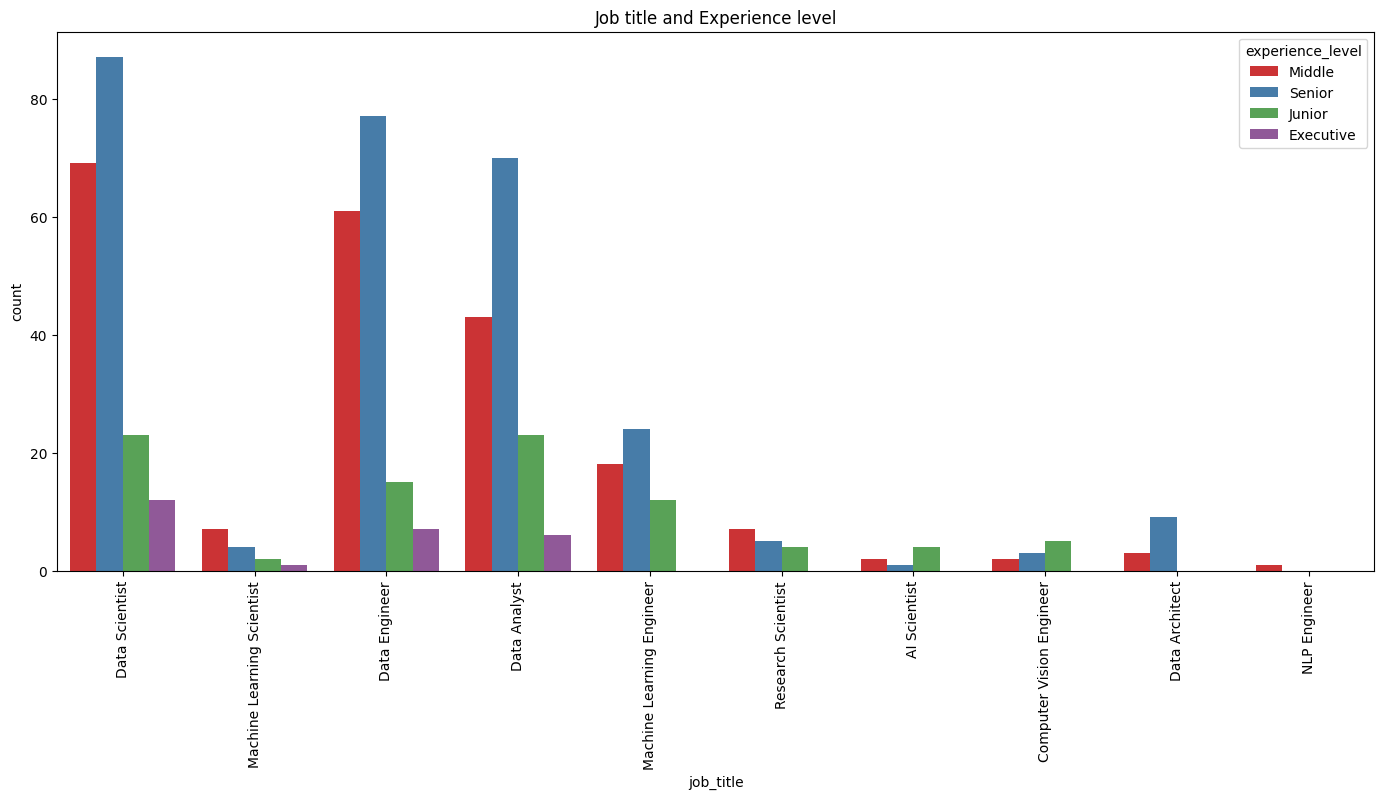

In [226]:
plt.figure(figsize=(17,7))
sns.set_palette('Set1')
ax = sns.countplot(data=df, x='job_title', hue='experience_level')
ax.set_title('Job title and Experience level')
plt.xticks(rotation=90)

#### Observations
- we can see that these positions, Experience Level: `Senior` are higher than others.
  - `Data Scientist`,
  - `Data Engineer`,
  - `Data Anlyst`,
  - `Machine Learning Engineer`, &
  - `Data Architech`

- that means company are hiring more `Senior levels employee` in this positions.
- `Middle experience level employee`comes second at these positions.

#### Relationship of Job Title and Salary

In [227]:
# fig = px.pie(df.groupby('job_title', as_index=False)['salary_in_usd'].count().sort_values(by='job_title'),
#              names='job_title', values='salary_in_usd', color='job_title', hole=0.6,
#              labels=['Job title', 'Experience Level'], template='seaborn', title='<b>Top 10 roles according to Experience Level')
# fig.update_layout(title_x=0.5)

fig = px.pie(df.groupby('experience_level', as_index=False)['job_title'].count().sort_values(by='job_title'),
             names='experience_level', values='job_title', color='job_title', hole=0.6,
             labels=['Job title', 'Experience Level'], template='seaborn', title='<b>Top 10 roles according to Experience Level')
fig.update_layout(title_x=0.5)

# Observation:
- Senior Employee is more in Almost every Job role.


#### Job title and Employment Type

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Data Scientist'),
  Text(1, 0, 'Machine Learning Scientist'),
  Text(2, 0, 'Data Engineer'),
  Text(3, 0, 'Data Analyst'),
  Text(4, 0, 'Machine Learning Engineer'),
  Text(5, 0, 'Research Scientist'),
  Text(6, 0, 'AI Scientist'),
  Text(7, 0, 'Computer Vision Engineer'),
  Text(8, 0, 'Data Architect'),
  Text(9, 0, 'NLP Engineer')])

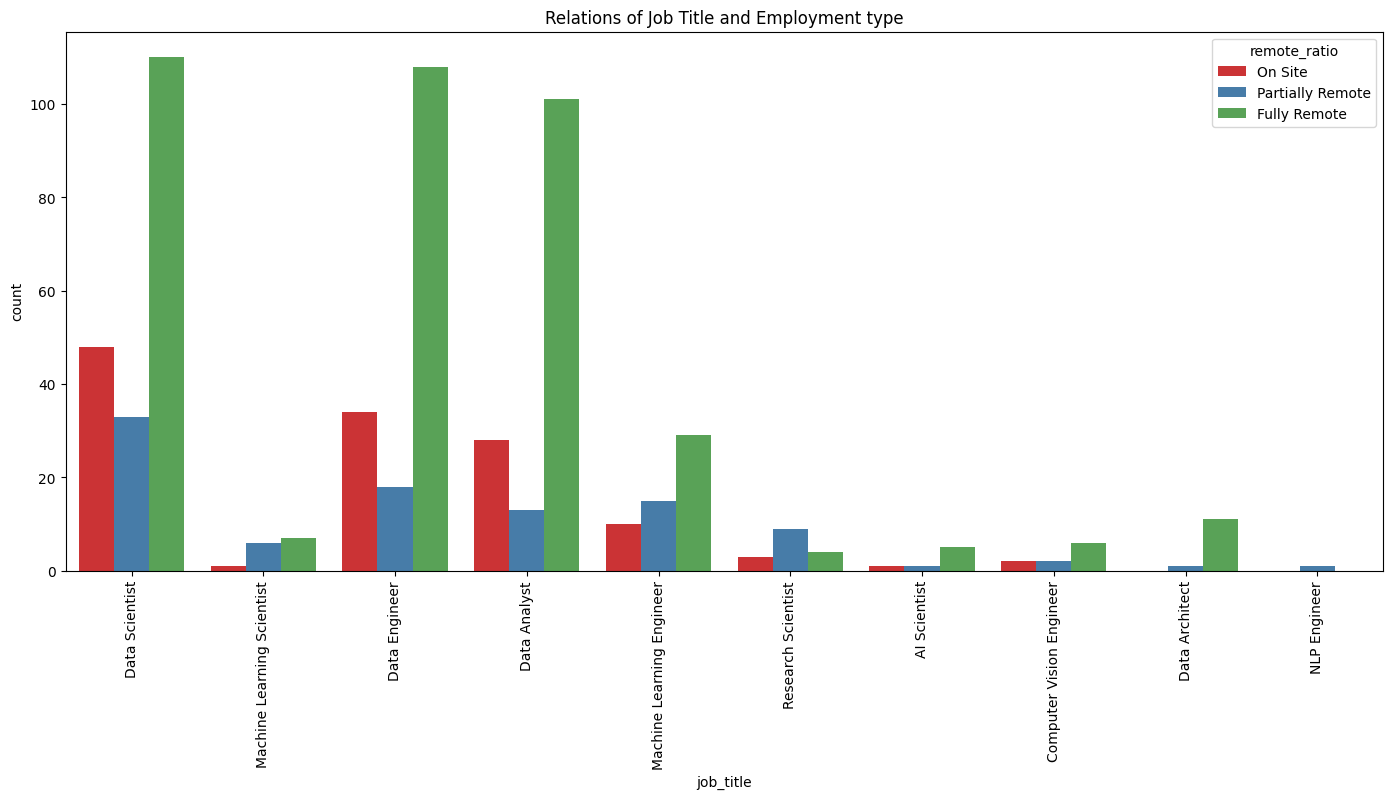

In [228]:
plt.figure(figsize=(17,7))
sns.set_palette('Set1')
sns.countplot(data=df, x='job_title', hue='remote_ratio')
plt.title('Relations of Job Title and Employment type')
plt.xticks(rotation=90)

#### Observations:
- Count of Fully Remote is in Top position in most job title.


#### Company Size VS Job Type Counts

Text(0.5, 1.0, 'Company size vs Job types')

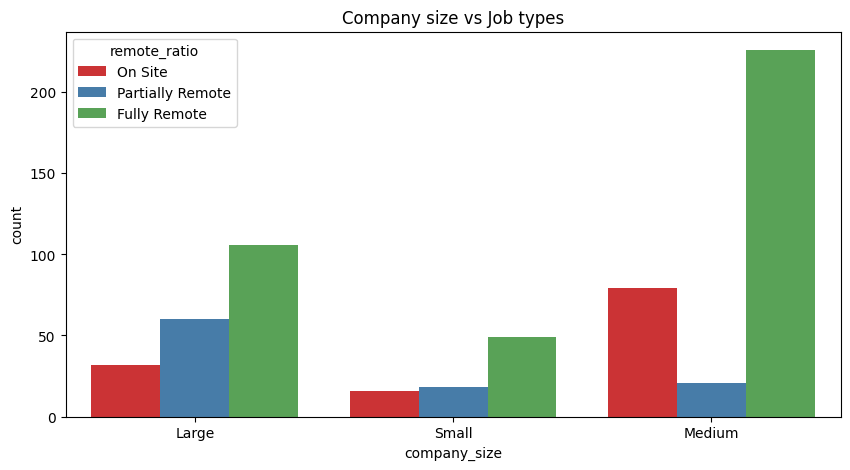

In [229]:
plt.figure(figsize=(10,5))
sns.set_palette('Set1')
ax = sns.countplot(data=df, x='company_size', hue='remote_ratio')
ax.set_title('Company size vs Job types')

#### Observation:
- Small-sized companies provide minimum onsite opportunities,
- whereas Medium-sized companies provide maximum remote work opportunities.

#### Relationship between Salary and Exprience

In [230]:
labels={'experience_level':'Experience Level','salary_in_usd':'salary in usd'}
px.box(df, x='experience_level', y='salary_in_usd', color='experience_level',
       labels=labels, title='<b> Data Science salary by Experience')

In [231]:
# using mean value of salary_in_usd
fig = px.pie(df.groupby('experience_level', as_index=False)['salary_in_usd'].mean().sort_values(by='experience_level'),
             names='experience_level', values='salary_in_usd', color='experience_level', hole=0.6,
             labels=['Experience Level', 'Salary'], template='seaborn', title='<b>Mean Salaries according to Experience Level')
fig.update_layout(title_x=0.5)

In [232]:
# using max value of salary_in_usd
fig = px.pie(df.groupby('experience_level', as_index=False)['salary_in_usd'].max().sort_values(by='experience_level'),
             names='experience_level', values='salary_in_usd', color='experience_level', hole=0.6,
             labels=['Experience Level', 'Salary'], template='seaborn', title='<b>Maximum Salaries according to Experience Level')
fig.update_layout(title_x=0.5)

#### Observations:
- According to Experience level, Mean & Maximum Salary of Executive levels got first position.
- 'Senior Level' in Mean salary section got second position.
- 'Middle Level' in Maximum salary section got second position.

# Multivariate Analysis

#### Corelation between Features

In [233]:
num_cols = ['work_year', 'salary_in_usd']
cat_cols = [df.columns[i] for i in range(len(df.columns)) if df.columns[i] not in num_cols]

from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
cat_cols_en = encoder.fit_transform(df[cat_cols])
cat_cols_en = pd.DataFrame(data=cat_cols_en, columns=cat_cols)
new_df = df[num_cols].join(cat_cols_en)
new_df.head()

,work_year,salary_in_usd,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,2020,79.833,2.0,2.0,5.0,17.0,1.0,15.0,0.0
1,2020,260.000,3.0,2.0,7.0,27.0,1.0,25.0,2.0
2,2020,109.024,3.0,2.0,4.0,52.0,2.0,47.0,1.0
3,2020,20.000,2.0,2.0,2.0,19.0,1.0,17.0,2.0
4,2020,150.000,3.0,2.0,6.0,53.0,2.0,48.0,0.0


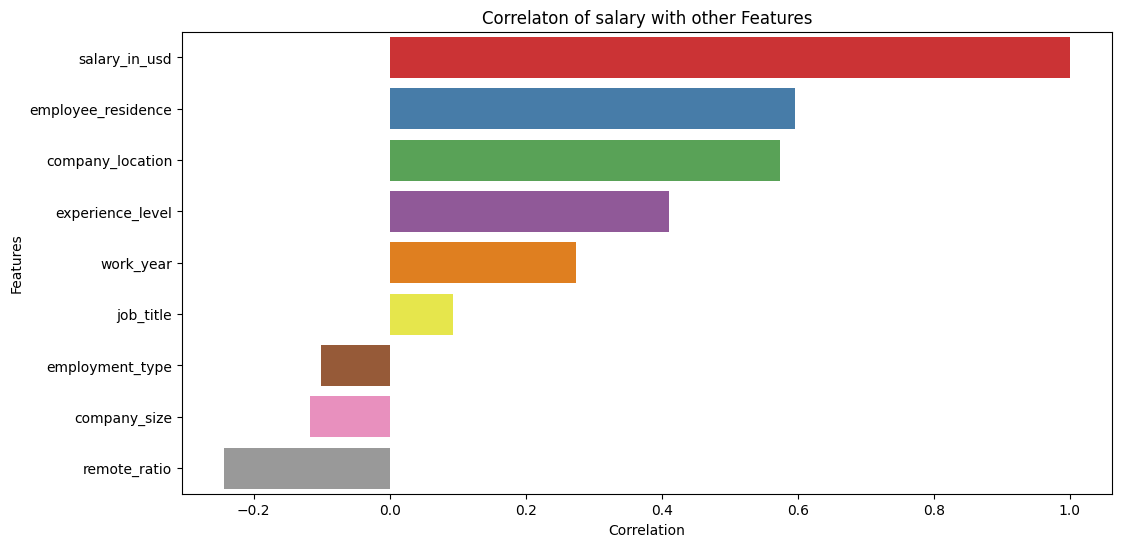

In [234]:
corr_matrix = new_df.corr(method='spearman')
spr = corr_matrix['salary_in_usd'].sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=spr.values, y=spr.index, orient='h')
plt.title('Correlaton of salary with other Features')
plt.xlabel('Correlation')
plt.ylabel('Features')
plt.show()

#### Observations:
- The Highest correlation of salary is with:
    - 1. Employee Residence
    - 2. Company Location
    - 3. Experience Level
- Employment type & Company size has a Negative correlation

#### job type and company size VS salary

Text(0.5, 1.0, 'Job Type & Company Size VS Salary')

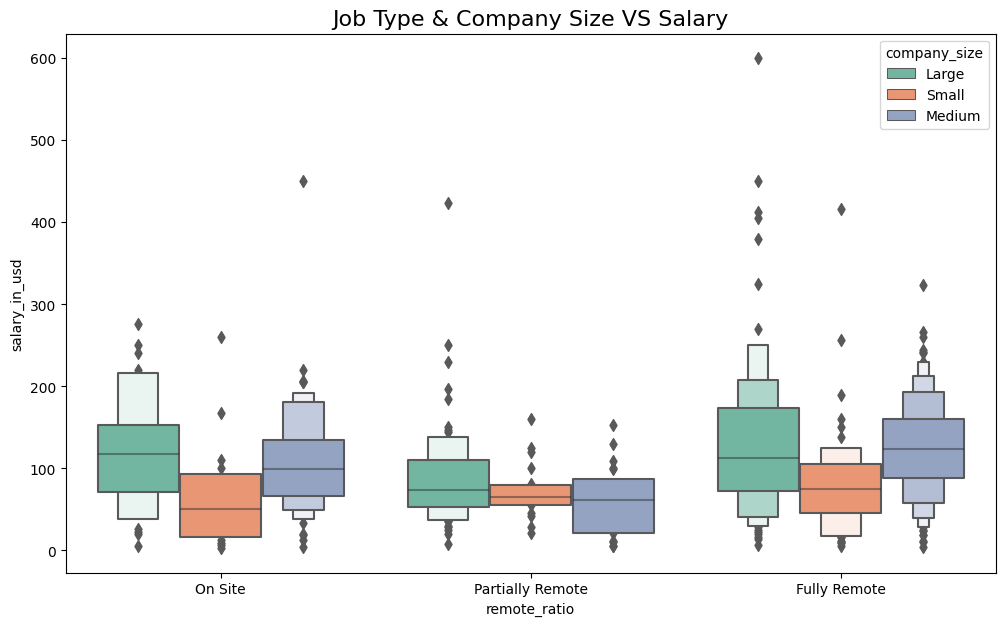

In [235]:

plt.figure(figsize=(12, 7))
sns.set_palette('Set2')
ax = sns.boxenplot(data=df, x='remote_ratio', y='salary_in_usd', hue='company_size')
ax.set_title('Job Type & Company Size VS Salary', fontdict={'fontsize': 16})

#### Observation:
- Lowest salary is seen in onsite job for a small company.
- Higher salary is seen in Fully remote job for a laege company.

In [236]:
df['salary_in_usd'].describe([0.2, 0.4, 0.95, 0.99, 1])

count    607.000000
mean     112.297870
std       70.957259
min        2.859000
20%       54.957000
40%       87.932000
50%      101.570000
95%      220.110000
99%      403.500000
100%     600.000000
max      600.000000
Name: salary_in_usd, dtype: float64

In [237]:
df['salary_in_usd'].max()

600.0

#### The relationship between salary_in_usd and experience_level and work_year

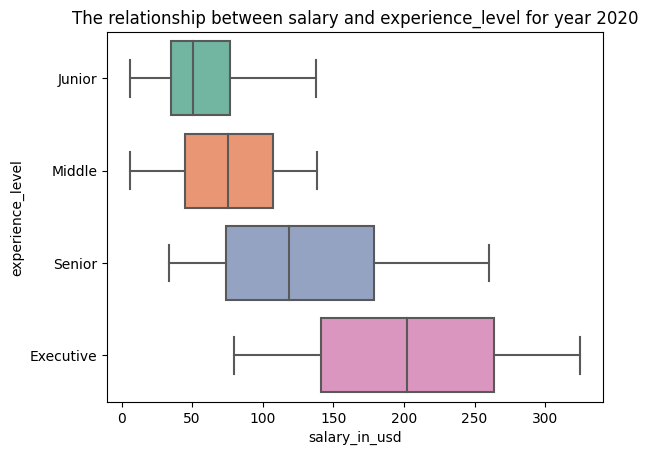

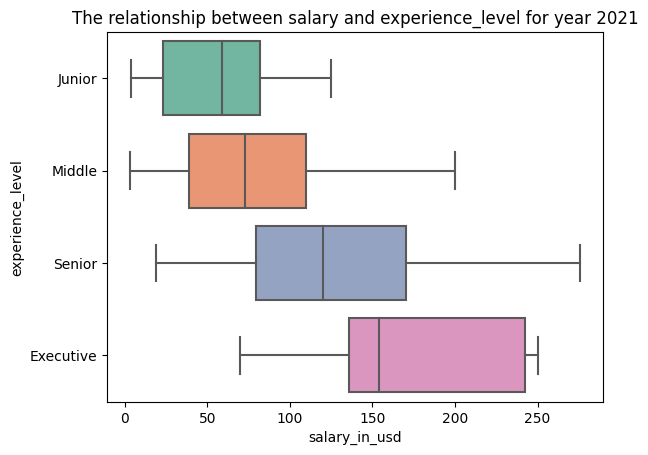

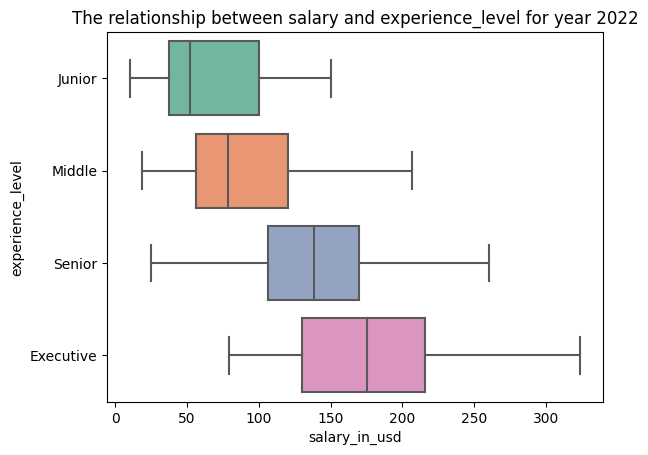

In [238]:
years = df['work_year'].unique()
order = ['Junior', 'Middle', 'Senior', 'Executive']

for year in years:
    data = df[df['work_year'] == year]    # select data only for a specific year
    sns.boxplot(x=data['salary_in_usd'], y=data['experience_level'], order=order, showfliers=False)
#     plt.title('The relationship between salary and experience_level for year {}'.format(year))
    plt.title(f'The relationship between salary and experience_level for year {year}')
    plt.show()

Text(0.5, 1.0, 'The relationship between Salary and experience level')

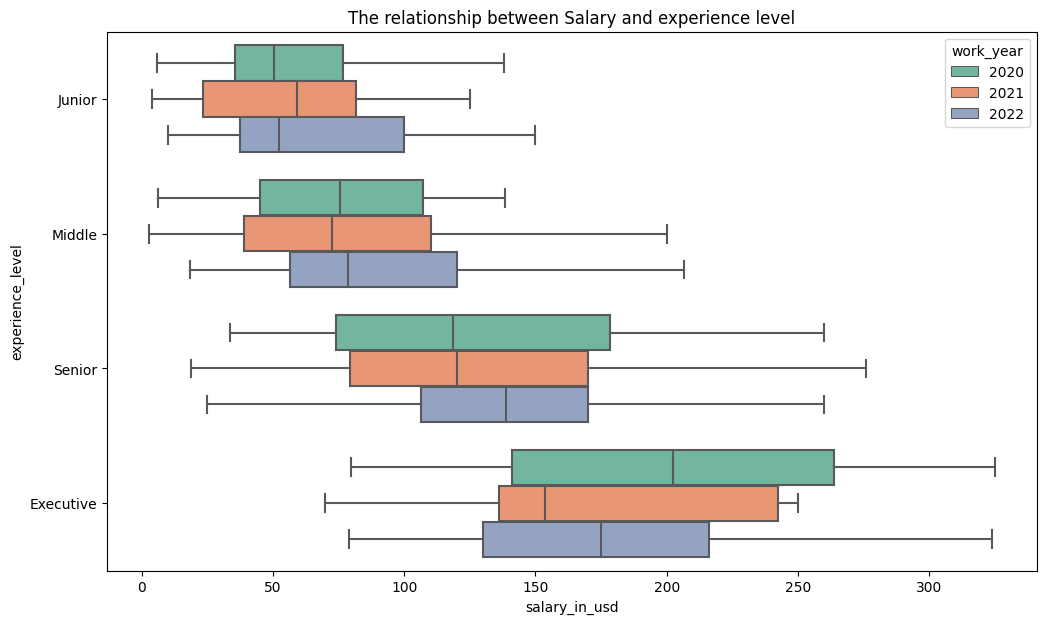

In [239]:
order = ['Junior', 'Middle', 'Senior', 'Executive']
plt.figure(figsize=(12,7))
sns.boxplot(x=df['salary_in_usd'], y=df['experience_level'], order=order, hue=df['work_year'], showfliers=False)
plt.title('The relationship between Salary and experience level')

### observation:
- in 2020, 2021, 2023 : `Executive` levels employee got more average salary than others.
- in 2020, 2021: `Executive` levels employee got max salary than others.
- in 2021: `Middle` levels employee got max salary than others.
- in 2020, 2022: `Executive ` levels employee got max salary than others.

# Regression Analysis

- The factorize function in Pandas assigns a unique numerical value to each distinct category in a categorical column. It returns two values: a new column with the numerical codes for each category, and an array that contains the unique categories themselves.

- In the given code, the line data[column], _ = pd.factorize(data[column]) assigns the numerical codes to the column in the data DataFrame, replacing the original categorical values. The underscore _ is used to discard the array of unique categories returned by factorize because it is not needed in this code.

- By applying factorize to each categorical column, the original categorical data is transformed into numerical data, allowing it to be used as input in the subsequent regression analysis.

- In the given code, the line X = sm.add_constant(X) adds a column of ones to the DataFrame X, which represents the independent variables in the regression model. This additional column serves as the constant term and ensures that the regression model includes an intercept.

### Observation:
- value of employee_residence is more than P>|t|=0.05 that means this feature is not suitable for Regression Model.

#### Corelation Analysis


In [241]:
# cor = data.corr(method="spearman")["salary_in_usd"].sort_values(ascending=True)
# cor

In [242]:
# cor.plot(kind='bar')

In [243]:
data = df.copy()
data.sample(10)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
484,2022,Senior,Full Time,Data Engineer,210.000,United States of America,Fully Remote,United States of America,Medium
502,2022,Junior,Full Time,Data Scientist,40.000,Japan,Fully Remote,Malaysia,Large
549,2022,Senior,Full Time,Data Engineer,160.000,United States of America,Fully Remote,United States of America,Medium
529,2022,Senior,Full Time,Data Analyst,90.320,United States of America,Fully Remote,United States of America,Medium
47,2020,Senior,Full Time,Data Engineer,188.000,United States of America,Fully Remote,United States of America,Large
60,2020,Middle,Full Time,Data Engineer,110.000,United States of America,Fully Remote,United States of America,Large
298,2022,Senior,Full Time,Data Scientist,136.620,United States of America,Fully Remote,United States of America,Medium
203,2021,Senior,Full Time,Research Scientist,50.000,France,Fully Remote,United States of America,Small
241,2021,Middle,Full Time,Data Analyst,80.000,United States of America,Fully Remote,United States of America,Large
221,2021,Middle,Full Time,Data Scientist,116.914,United Kingdom (Great Britain),Partially Remote,United Kingdom (Great Britain),Large


# Feature Engineering for Model

In [244]:
# checking and melting `employee_residence` and `company-location` column

a = []
for (i, j) in zip(data['employee_residence'], data['company_location']):
  if i == j:
    a.append('Yes')
  else:
    a.append('No')

data['residence_company_same_place'] = a
data.sample(10)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,residence_company_same_place
504,2022,Senior,Full Time,Data Engineer,115.000,United States of America,Fully Remote,United States of America,Medium,Yes
1,2020,Senior,Full Time,Machine Learning Scientist,260.000,Japan,On Site,Japan,Small,Yes
536,2022,Senior,Full Time,Data Analyst,112.900,United States of America,Fully Remote,United States of America,Medium,Yes
228,2021,Senior,Full Time,Data Scientist,135.000,United States of America,On Site,United States of America,Large,Yes
400,2022,Senior,Full Time,Data Engineer,209.100,United States of America,Fully Remote,United States of America,Large,Yes
62,2020,Junior,Part Time,Data Scientist,21.669,Italy,Partially Remote,Italy,Small,Yes
311,2022,Middle,Full Time,Data Scientist,65.438,United Kingdom (Great Britain),On Site,United Kingdom (Great Britain),Medium,Yes
125,2021,Middle,Full Time,Data Scientist,151.000,United States of America,Fully Remote,United States of America,Large,Yes
478,2022,Middle,Full Time,Data Scientist,200.000,United States of America,Fully Remote,United States of America,Medium,Yes
561,2022,Senior,Full Time,Data Analyst,184.700,United States of America,On Site,United States of America,Medium,Yes


## Separating Outliers
- taking 99 quantile of values to a new dataframe `df1`

In [245]:
data['salary_in_usd'].describe([.20, .40, .90, .99]).T

count    607.000000
mean     112.297870
std       70.957259
min        2.859000
20%       54.957000
40%       87.932000
50%      101.570000
90%      200.000000
99%      403.500000
max      600.000000
Name: salary_in_usd, dtype: float64

In [246]:
outliers = data.quantile(0.99)
df1 = data[(data['salary_in_usd'] < outliers['salary_in_usd'])]

In [247]:
df1['salary_in_usd'].describe([.20, .40, .90, .99])

count    600.000000
mean     108.348012
std       60.763133
min        2.859000
20%       54.641200
40%       87.854400
50%      100.000000
90%      192.567600
99%      260.064000
max      380.000000
Name: salary_in_usd, dtype: float64

In [248]:
# creating new features using MEAN MIN, MAX of salaries along with all the features

data['new_mean_salary'] = data.groupby(['work_year','experience_level','employment_type','job_title','employee_residence',
                      'remote_ratio','company_location','company_size','residence_company_same_place'])['salary_in_usd'].transform('mean')
data['new_minimum_salary'] = data.groupby(['work_year','experience_level','employment_type','job_title','employee_residence',
                      'remote_ratio','company_location','company_size','residence_company_same_place'])['salary_in_usd'].transform('min')
data['new_maximum_salary'] = data.groupby(['work_year','experience_level','employment_type','job_title','employee_residence',
                      'remote_ratio','company_location','company_size','residence_company_same_place'])['salary_in_usd'].transform('max')

In [249]:
# Showing the null values as per attributes
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

employee_residence    2
new_mean_salary       2
new_minimum_salary    2
new_maximum_salary    2
dtype: int64

In [250]:
# Filling missing values using columns mean values

data['new_mean_salary'] = data['new_mean_salary'].fillna(data['new_mean_salary'].mean())
data['new_minimum_salary'] = data['new_minimum_salary'].fillna(data['new_minimum_salary'].mean())
data['new_maximum_salary'] = data['new_maximum_salary'].fillna(data['new_maximum_salary'].mean())
data.isnull().sum().any()

True

In [251]:
data['company_size'].unique()

array(['Large', 'Small', 'Medium'], dtype=object)

In [252]:
# replacing columns values

data['experience_level'] = data['experience_level'].replace({'Junior':1, 'Middle':2, 'Senior':3, 'Executive':4})
data['employment_type'] = data['employment_type'].replace({'Full Time':1, 'Part Time':2, 'Freelance':3, 'Contract':4})
data['remote_ratio'] = data['remote_ratio'].replace({'On Site':1, 'Partially Remote':2, 'Fully Remote':3})
data['company_size'] = data['company_size'].replace({'Large':1, 'Medium':2, 'Small':3})


# One Hot Encoding

- `ওয়ান হট এনকোডার হোল একটি জনপ্রিয় এনকডার যার মাধ্যমে ক্যাটেগরিক্যাল ভ্যারিয়্যাবলকে আলাদা আলাদা কলামে কনভার্ট করা যায়
এবং প্রতিটি কলামে বুলিয়ান ট্রু / ফলস বা 0/1 দ্বারা তাদের উপস্থিতি প্রকাশ করা যায়।`

In [253]:
# One Hot Encoding

data = pd.get_dummies(data, columns=['job_title','employee_residence','company_location','residence_company_same_place'])
data.head()

,work_year,experience_level,employment_type,salary_in_usd,remote_ratio,company_size,new_mean_salary,new_minimum_salary,new_maximum_salary,job_title_AI Scientist,...,company_location_Spain,company_location_Switzerland,company_location_Turkey,company_location_Ukraine,company_location_United Arab Emirates,company_location_United Kingdom (Great Britain),company_location_United States of America,company_location_Viet Nam,residence_company_same_place_No,residence_company_same_place_Yes
0,2020,2,1,79.833,1,1,79.833,79.833,79.833,0,...,0,0,0,0,0,0,0,0,0,1
1,2020,3,1,260.000,1,3,260.000,260.000,260.000,0,...,0,0,0,0,0,0,0,0,0,1
2,2020,3,1,109.024,2,2,109.024,109.024,109.024,0,...,0,0,0,0,0,1,0,0,0,1
3,2020,2,1,20.000,1,3,20.000,20.000,20.000,0,...,0,0,0,0,0,0,0,0,0,1
4,2020,3,1,150.000,2,1,150.000,150.000,150.000,0,...,0,0,0,0,0,0,1,0,0,1


# Applying Random Forest Regressor

In [285]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, classification_report, accuracy_score
from sklearn import metrics
import statsmodels.api as sm


# Defining features and target variable
y = data['salary_in_usd']
x = data.drop(['salary_in_usd'], axis=1)

# Get the column names
feature_names = x.columns

# fitting Random Forest model to our features and target variable(label)
rf = RandomForestRegressor(n_estimators=100, max_depth=50, random_state=42)
rf.fit(x, y)

RandomForestRegressor(max_depth=50, random_state=42)

In [286]:
# Getting feature importance scores
feature_importance = rf.feature_importances_
feature_importance

array([5.72724973e-04, 1.20470034e-03, 1.22880208e-05, 1.18888974e-03,
       4.50832617e-04, 8.53893822e-01, 7.57120586e-02, 6.05535431e-02,
       7.13557786e-07, 1.00006193e-06, 2.97966411e-04, 4.89313571e-04,
       2.37174407e-03, 6.71374580e-04, 9.26049031e-05, 1.17611023e-04,
       6.80078748e-09, 2.77865486e-04, 0.00000000e+00, 0.00000000e+00,
       4.23881318e-07, 2.27135993e-07, 9.36654145e-09, 9.45324721e-09,
       6.61451736e-08, 4.73826338e-08, 1.19651952e-04, 1.44833686e-11,
       2.56229614e-07, 2.62327147e-10, 1.27604608e-10, 1.42594928e-10,
       2.09277159e-09, 7.64925340e-09, 3.97586013e-07, 4.65212540e-05,
       1.02212616e-05, 2.81064900e-21, 1.38896517e-08, 6.68247257e-09,
       9.28338134e-06, 0.00000000e+00, 6.22386931e-09, 1.88948026e-08,
       1.95399649e-07, 5.62948024e-06, 8.45437966e-09, 4.55596490e-09,
       0.00000000e+00, 4.23222006e-10, 5.36815660e-08, 1.32801725e-08,
       1.87585457e-07, 6.41515134e-07, 4.33048785e-10, 4.36065976e-07,
      

In [287]:
# separating feature importance 'feature names' & their 'scores'
feature_importance = rf.feature_importances_
feature_importance= pd.DataFrame({'names': feature_names, 'importance': feature_importance})

# showing first 10 features with features name and their score
feature_importance.head(10)

,names,importance
0,work_year,5.727250e-04
1,experience_level,1.204700e-03
2,employment_type,1.228802e-05
3,remote_ratio,1.188890e-03
4,company_size,4.508326e-04
5,new_mean_salary,8.538938e-01
6,new_minimum_salary,7.571206e-02
7,new_maximum_salary,6.055354e-02
8,job_title_AI Scientist,7.135578e-07
9,job_title_Computer Vision Engineer,1.000062e-06


In [288]:
# Sorting the features by their importance
feature_importance_sorted = feature_importance.sort_values(by='importance', ascending=False)
feature_importance_sorted.head(10)

,names,importance
5,new_mean_salary,0.853894
6,new_minimum_salary,0.075712
7,new_maximum_salary,0.060554
12,job_title_Data Engineer,0.002372
1,experience_level,0.001205
3,remote_ratio,0.001189
88,company_location_Germany,0.001139
13,job_title_Data Scientist,0.000671
0,work_year,0.000573
11,job_title_Data Architect,0.000489


<Axes: >

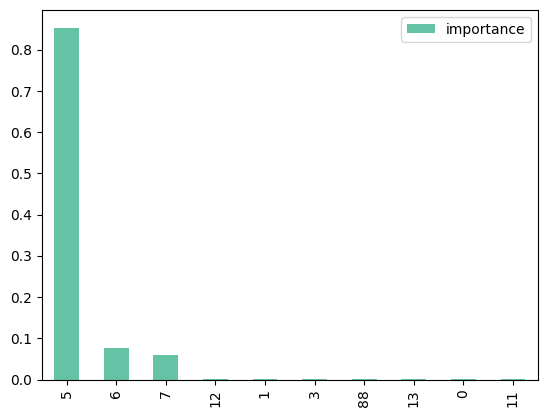

In [289]:
feature_importance_sorted.head(10).plot(kind='bar')

In [290]:
# storing top 10 sorted features & apply on ols stat model
top_features = feature_importance_sorted.head(10)['names']

x_selected = x[top_features]
ols_model = sm.OLS(y, x_selected).fit()

# Print the OLS model
print(ols_model.summary())

                                 OLS Regression Results                                
Dep. Variable:          salary_in_usd   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              1236.
Date:                Sun, 13 Aug 2023   Prob (F-statistic):                        0.00
Time:                        15:12:25   Log-Likelihood:                         -2894.8
No. Observations:                 607   AIC:                                      5810.
Df Residuals:                     597   BIC:                                      5854.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

## Now scaling and separating train and test set for the prediction

In [291]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [292]:
y_pred = rf.predict(x_test)
y_pred

array([142.33129094, 142.33129094,  95.24664048, 263.97133333,
        25.56616333, 151.24575143,  51.338395  ,  49.72807   ,
        69.44896831,  58.96483333,  62.72647   , 142.33129094,
       142.33129094,  24.73565   , 149.0069625 , 142.33129094,
        59.1935    , 135.47509724,  22.81623333, 114.42800934,
       109.626135  ,  12.12404   , 142.33129094, 155.70842857,
        18.16695   ,  71.51959567, 129.78891694, 123.99304762,
       114.42800934,  83.90862178,  82.63938333, 114.42800934,
        78.98425333,  10.04233   ,  56.436878  , 114.42800934,
       154.13278211,  95.36461976,  18.16974   , 111.43099533,
       165.44775066, 165.44775066, 117.76172333,  71.35870298,
       114.42800934, 115.22916762,  20.01987333, 135.47509724,
       110.67686435, 234.40337897, 114.42800934,   3.36373   ,
       112.35566704, 114.42800934, 142.33129094, 114.42800934,
       148.16087214, 140.88598357,   4.07483   ,  83.18340821,
       134.30825079,   9.50577   ,   5.47736   , 413.71

## Checking
- Mean squared Error,
- Mean Absolute Error,
- Root Mean Squared Error,
- Accuracy of the model

In [293]:
print('MAS :', metrics.mean_absolute_error(y_test, y_pred))
print('MSE :', metrics.mean_squared_error(y_test, y_pred))
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
accuracy = rf.score(x_test, y_test)
print('AccuracyII: ', accuracy*100, '%')
print('R2: ', r2_score(y_test, y_pred))

MAS : 9.83875394333003
MSE : 331.0808322445805
RMSE : 18.195626734041905
AccuracyII:  91.36138665760188 %
R2:  0.9136138665760188


## Drawing a regression plot of the model

<Axes: xlabel='salary_in_usd'>

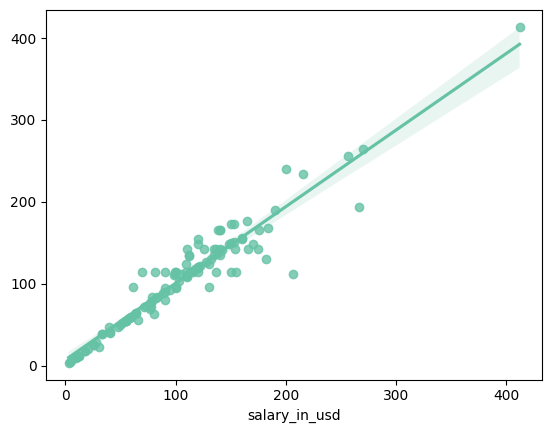

In [294]:
import seaborn as sns
sns.regplot(x=y_test, y=y_pred)


# Observations:
- 	Top 10	feature importance are:
- [index----feature name--------score]
  - 5	new_mean_salary	0.853894
  - 6	new_minimum_salary	0.075712
  - 7	new_maximum_salary	0.060554
  - 12	job_title_Data Engineer	0.002372
  - 1	experience_level	0.001205
  - 3	remote_ratio	0.001189
  - 88	company_location_Germany	0.001139
  - 13	job_title_Data Scientist	0.000671
  - 0	work_year	0.000573
  - 11	job_title_Data Architect	0.000489

- R squared value of Accuracy is : 0.91%. That means our model/ regression line can fit or touch 91% feature variable.

- Adj. R-squared (uncentered): 0.953 means if we increase the feature variables then our accuracy will increase. but if we increase the feature variables & `R-squared` increase but `Adj. R-square` doesn't then adding more feature doesn't increase the model. here `R-squared` = 0.954 & `Adj. R-square` = 0.953 which is says `R-squared` ~ `Adj. R-square`. so no need to add more feature variables.
- Prob (F-statistic): the value of Prob (F-statistic) should below (0.05). if Prob (F-statistic)> 0.05 then our model is not good for regression. its very important Prob (F-statistic)<0.05
- P>|t| - Those which coefficients p>|t| value is more than 0.05 (p>|t| > 0.05) we can remove them because they are not important for our model.
- Df Model- Number of Independent features model consumed.
Dep. Variable-  Number of dependent feature (target/ label)
- Mean Absolute Error - (MAS) : 9.83875394333003
- Mean Squared Error -(MSE) : 331.0808322445805
- Root Mean Squared Error -(RMSE) : 18.195626734041905
- Accuracy-(R2 Score):  0.9136138665760188 ~ 91%

# Now comparing the Acuracy and error of different models

# Model Creation

## Import libraries

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize, scale
from sklearn.pipeline import Pipeline, make_pipeline

# Model Cooking

In [295]:

y=data['salary_in_usd']
X=data.drop(['salary_in_usd'],axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
y= y.values.reshape(-1,1)
y = np.log(y)


def regression(x, y):
    rf = RandomForestRegressor()
    lg = LGBMRegressor()
    kn = KNeighborsRegressor()
    et = ExtraTreeRegressor()
    gb = GradientBoostingRegressor()
    dt = DecisionTreeRegressor()
    xgb = XGBRegressor()


    algos = [rf,lg , kn, et, gb, dt,xgb]
    algos_names = ["Random Forest","LGBM", 'KNeighbors', 'ExtraTree', 'GradientBoosting',
                   'DecisionTree','XGB']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

    r_score = []
    mse = []
    mae = []
    rmse = []


    result = pd.DataFrame(columns=['R_square', 'MSE', 'MAE', 'RMSE'], index=algos_names)

    for algo in algos:
        pred = algo.fit(x_train, y_train).predict(x_test)
        r_score.append(r2_score(y_test, pred))
        mse.append(mean_squared_error(y_test, pred) ** .5)
        mae.append(mean_absolute_error(y_test, pred))
        rmse.append(np.sqrt(mean_absolute_error(y_test, pred)))


    result.R_square = r_score
    result.MSE = mse
    result.MAE = mae
    result.RMSE = rmse


    return result.sort_values('R_square', ascending=False)



In [296]:
regression(X, y)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000126 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 377
[LightGBM] [Info] Number of data points in the train set: 485, number of used features: 21
[LightGBM] [Info] Start training from score 4.509813
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

,R_square,MSE,MAE,RMSE
Random Forest,0.945127,0.196458,0.116022,0.340620
GradientBoosting,0.941213,0.203342,0.117459,0.342724
XGB,0.940079,0.205294,0.122234,0.349620
DecisionTree,0.924845,0.229915,0.124327,0.352601
ExtraTree,0.917075,0.241508,0.138793,0.372550
LGBM,0.893387,0.273838,0.158087,0.397601
KNeighbors,0.389352,0.655365,0.385903,0.621211


# Observations:
Model Name----------Accuracy
- Random Forest:	  0.945127	  
- GradientBoosting:	0.941213
- XGB:	            0.940079
- DecisionTree:	    0.924845
- ExtraTree:	      0.917075
- LGBM:	            0.893387
- KNeighbors:	      0.389352